# Group Members: Tharun Prabhakar, Niranjan Kumar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

In [2]:
df=pd.read_csv("SPY.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,476.299988,477.850006,473.850006,477.709991,464.923370,72668200
1,2022-01-04,479.220001,479.980011,475.579987,477.549988,464.767700,71178700
2,2022-01-05,477.160004,477.980011,468.279999,468.380005,455.843079,104538900
3,2022-01-06,467.890015,470.820007,465.429993,467.940002,455.414886,86858900
4,2022-01-07,467.950012,469.200012,464.649994,466.089996,453.614410,85111600


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,476.299988,477.850006,473.850006,477.709991,464.923370,72668200
1,2022-01-04,479.220001,479.980011,475.579987,477.549988,464.767700,71178700
2,2022-01-05,477.160004,477.980011,468.279999,468.380005,455.843079,104538900
3,2022-01-06,467.890015,470.820007,465.429993,467.940002,455.414886,86858900
4,2022-01-07,467.950012,469.200012,464.649994,466.089996,453.614410,85111600


In [7]:
df['Volatility']=(df.High-df.Low)/df.Close

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility
0,2022-01-03,476.299988,477.850006,473.850006,477.709991,464.923370,72668200,0.008373
1,2022-01-04,479.220001,479.980011,475.579987,477.549988,464.767700,71178700,0.009214
2,2022-01-05,477.160004,477.980011,468.279999,468.380005,455.843079,104538900,0.020710
3,2022-01-06,467.890015,470.820007,465.429993,467.940002,455.414886,86858900,0.011519
4,2022-01-07,467.950012,469.200012,464.649994,466.089996,453.614410,85111600,0.009762


In [9]:
df['Volume_delta']=[np.abs(df.Volume[i]-df.Volume[i-1]) if i!=0 else 0 for i in range(len(df))]
df['Volatility_delta']=[np.abs(df.Volatility[i]-df.Volatility[i-1]) if i!=0 else 0 for i in range(len(df))]

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta
0,2022-01-03,476.299988,477.850006,473.850006,477.709991,464.923370,72668200,0.008373,0,0.000000
1,2022-01-04,479.220001,479.980011,475.579987,477.549988,464.767700,71178700,0.009214,1489500,0.000840
2,2022-01-05,477.160004,477.980011,468.279999,468.380005,455.843079,104538900,0.020710,33360200,0.011496
3,2022-01-06,467.890015,470.820007,465.429993,467.940002,455.414886,86858900,0.011519,17680000,0.009191
4,2022-01-07,467.950012,469.200012,464.649994,466.089996,453.614410,85111600,0.009762,1747300,0.001756


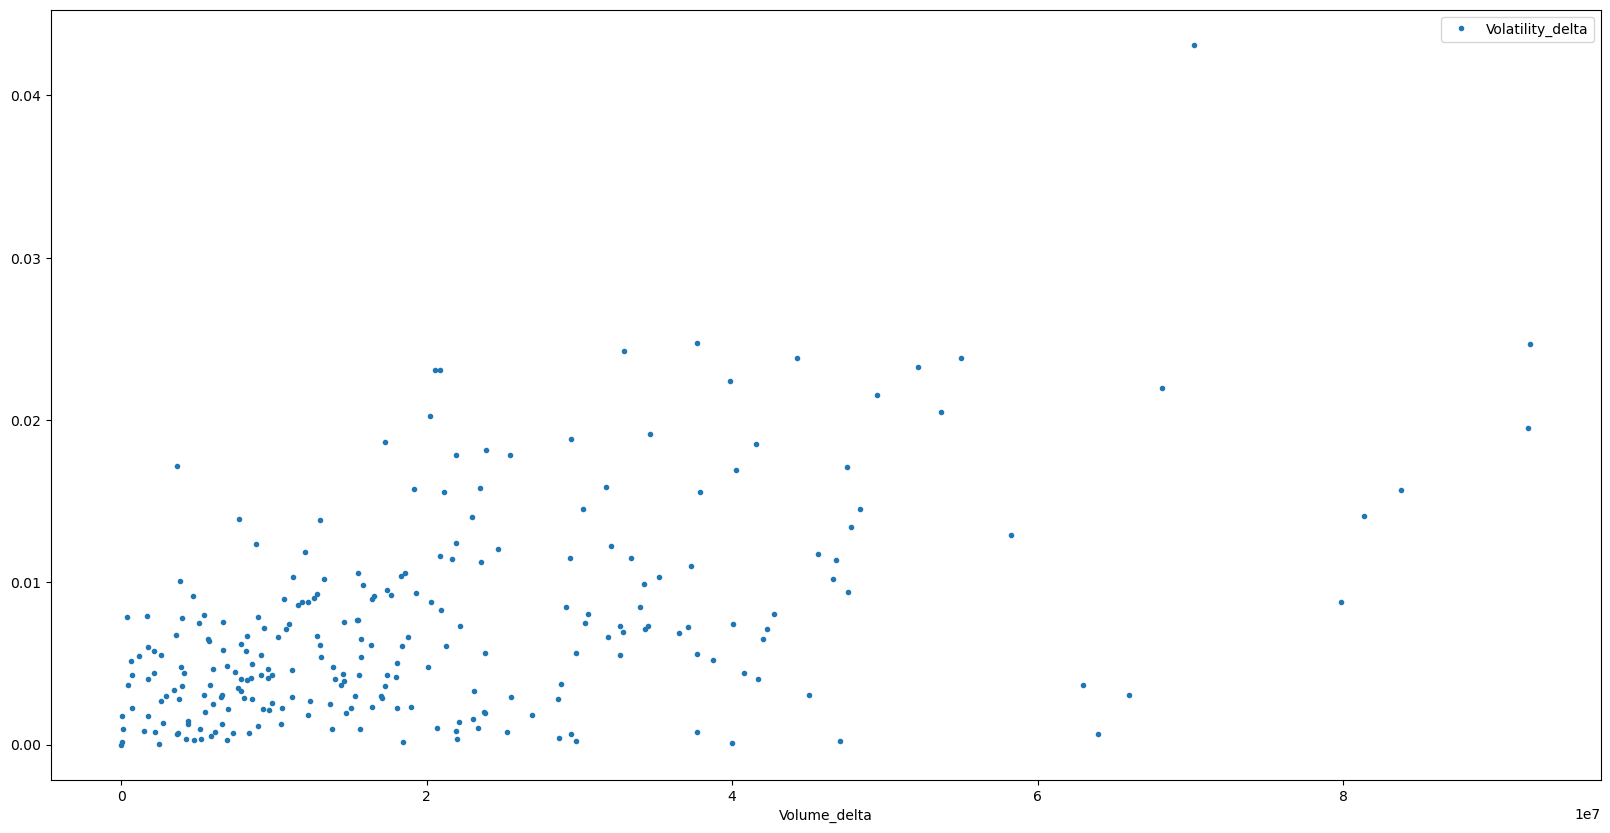

In [11]:
df.plot(x='Volume_delta', y='Volatility_delta', style='.')
plt.show()

## Checkin Data

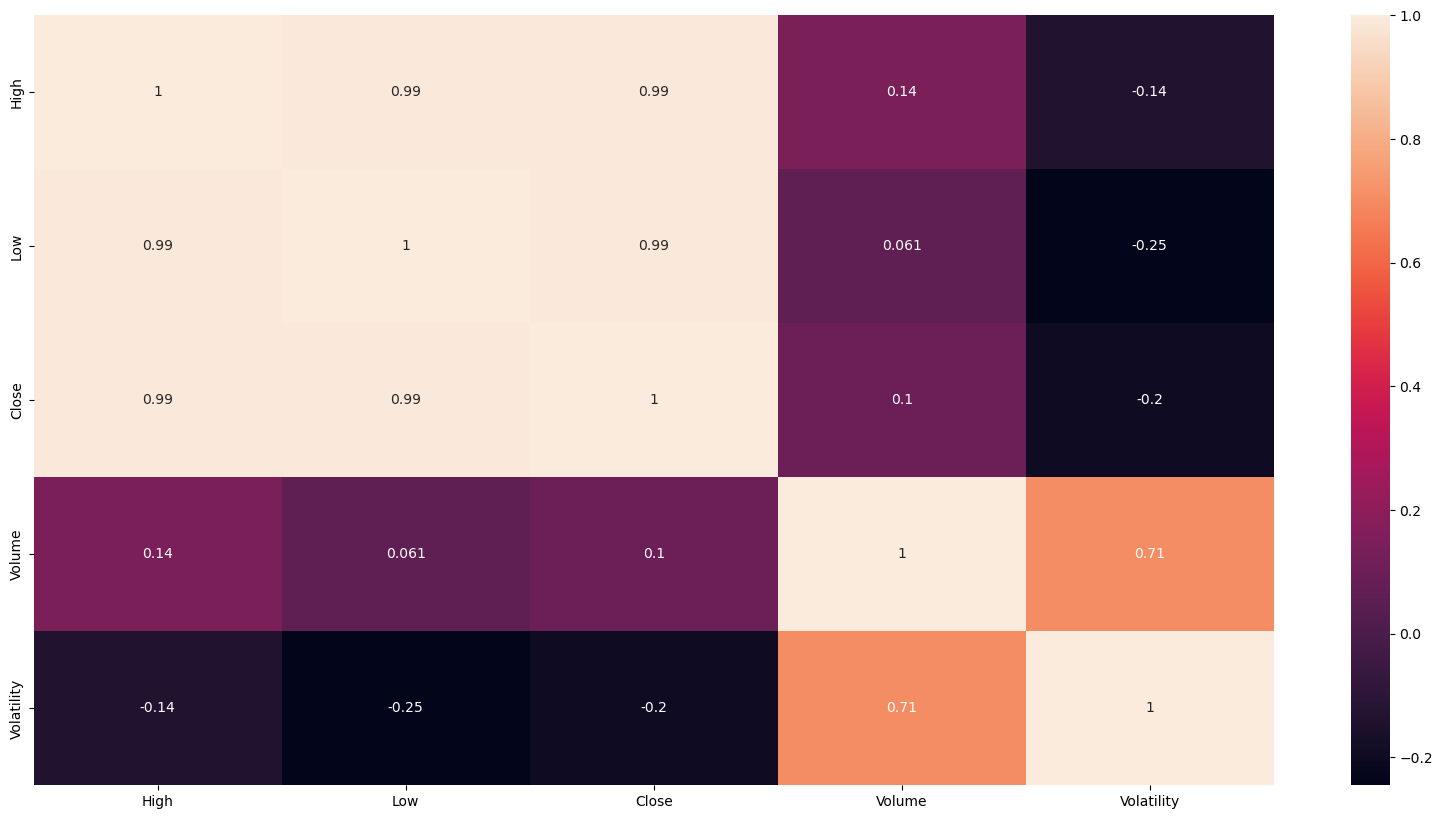

In [12]:
sb.heatmap(df[['High','Low','Close','Volume','Volatility']].corr(),annot=True)
plt.show()

## Functions

In [13]:
def predict(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Volatility']=(df.High-df.Low)/df.Close
    df['Volume_delta']=[np.abs(df.Volume[i]-df.Volume[i-1]) if i!=0 else 0 for i in range(len(df))]
    df['Volatility_delta']=[np.abs(df.Volatility[i]-df.Volatility[i-1]) if i!=0 else 0 for i in range(len(df))]
    X = df[['Volume','High','Low','Close']]
    y = df['Volatility']
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_,model.intercept_

def error(df,slope,intercept):
    df['Predicted_Volatility']=(slope[0]*df.Volume)+(slope[1]*df.High)+(slope[2]*df.Low)+(slope[3]*df.Close)+ intercept
    df['Percent_Error']=(np.abs(df.Predicted_Volatility-df.Volatility)/df.Volatility)*100
    

def equation(model,intercept):
    return f"Volatility = {model[0]} * Volume + {model[1]} *High + {model[2]} *Low + {model[3]} *Close + {intercept}"

def plot(df):
    if 'Predicted_Volatility' in df.columns:
        plt.scatter(x=df['Volume'], y=df['Volatility'], label='Actual Data')
        plt.scatter(x=df['Volume'], y=df['Predicted_Volatility'], color='red', label='Linear Regression')
        plt.xlabel('Volume')
        plt.ylabel('Volatility')
        plt.legend()
        plt.show()
    else:
        df['Date']=pd.to_datetime(df['Date'])
        df['Volatility']=(df.High-df.Low)/df.Close
        df['Volume_delta']=[np.abs(df.Volume[i]-df.Volume[i-1]) if i!=0 else 0 for i in range(len(df))]
        df['Volatility_delta']=[np.abs(df.Volatility[i]-df.Volatility[i-1]) if i!=0 else 0 for i in range(len(df))]
        df.plot(y='Volatility_delta', x='Volume_delta', style='.')
        plt.show()
    
    

In [14]:
slope,intercept=predict(df)
error(df,slope,intercept)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2022-01-03,476.299988,477.850006,473.850006,477.709991,464.923370,72668200,0.008373,0,0.000000,0.006912,17.448239
1,2022-01-04,479.220001,479.980011,475.579987,477.549988,464.767700,71178700,0.009214,1489500,0.000840,0.007926,13.978097
2,2022-01-05,477.160004,477.980011,468.279999,468.380005,455.843079,104538900,0.020710,33360200,0.011496,0.021323,2.960608
3,2022-01-06,467.890015,470.820007,465.429993,467.940002,455.414886,86858900,0.011519,17680000,0.009191,0.010720,6.931201
4,2022-01-07,467.950012,469.200012,464.649994,466.089996,453.614410,85111600,0.009762,1747300,0.001756,0.008727,10.599964


#### The Equation

In [15]:
equation(slope,intercept)

The equation is: Volatility = -4.722611833916634e-12 * Volume + 0.0024817360595476984 *High + -0.002478098396211099 *Low + -4.66664515754614e-05 *Close + 0.01789785380140799


'Volatility = -4.722611833916634e-12 * Volume + 0.0024817360595476984 *High + -0.002478098396211099 *Low + -4.66664515754614e-05 *Close + 0.01789785380140799'

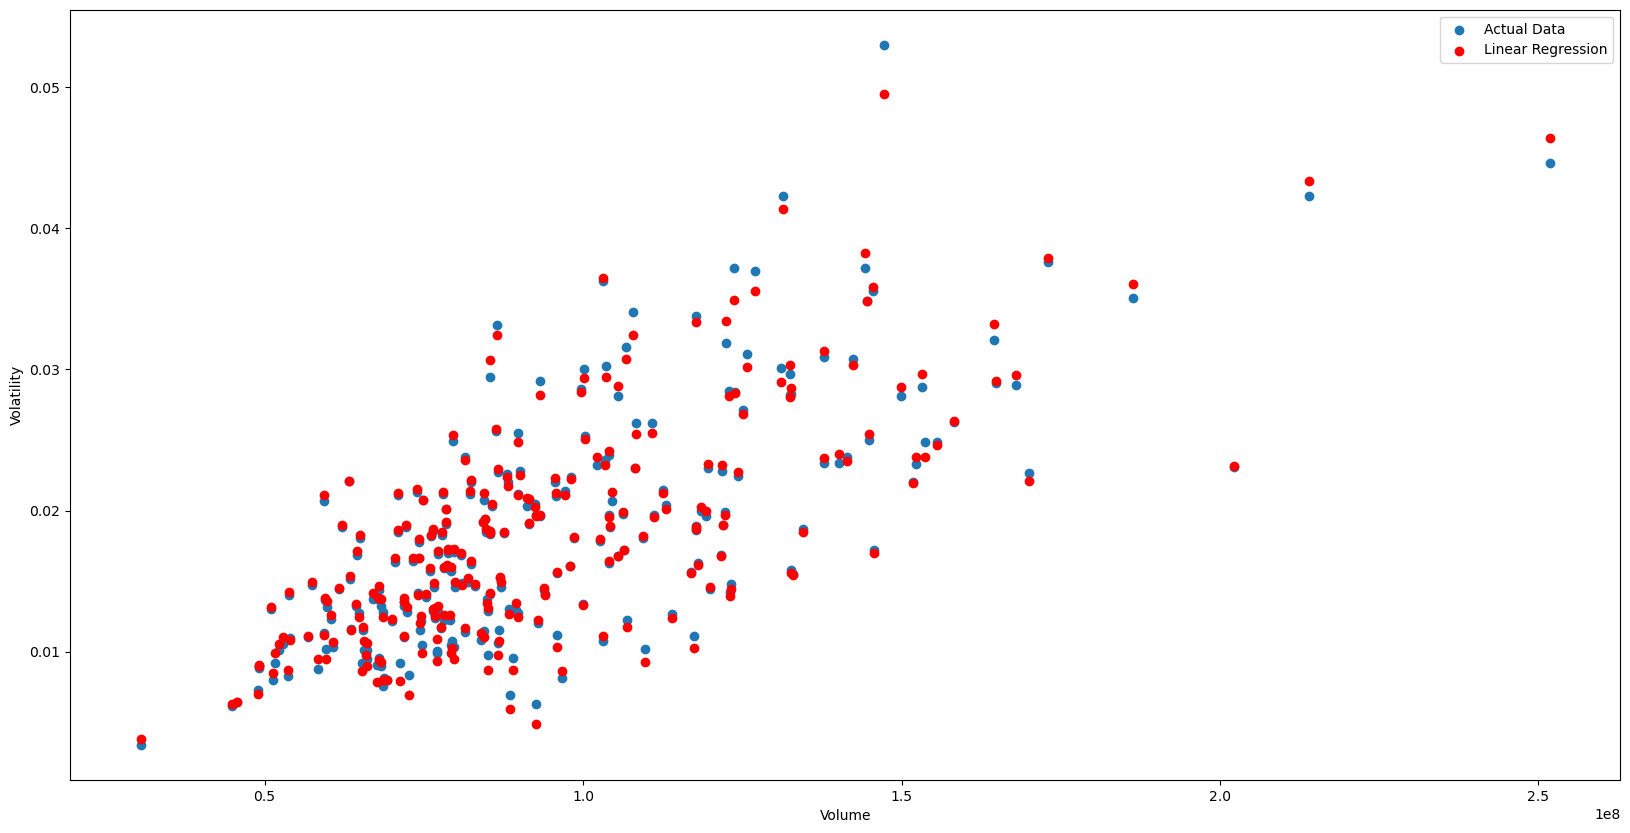

In [16]:
plot(df)

#### 5 Year Data

In [17]:
df1=pd.read_csv("SPY-5Y.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-02,274.750000,275.230011,269.589996,271.890015,250.119980,122634100
1,2018-11-05,272.440002,274.010010,271.350006,273.390015,251.499863,65622500
2,2018-11-06,273.320007,275.299988,273.250000,275.119995,253.091263,60085900
3,2018-11-07,277.559998,281.100006,277.079987,281.010010,258.509705,102752100
4,2018-11-08,280.109985,281.220001,279.220001,280.500000,258.040619,65584900


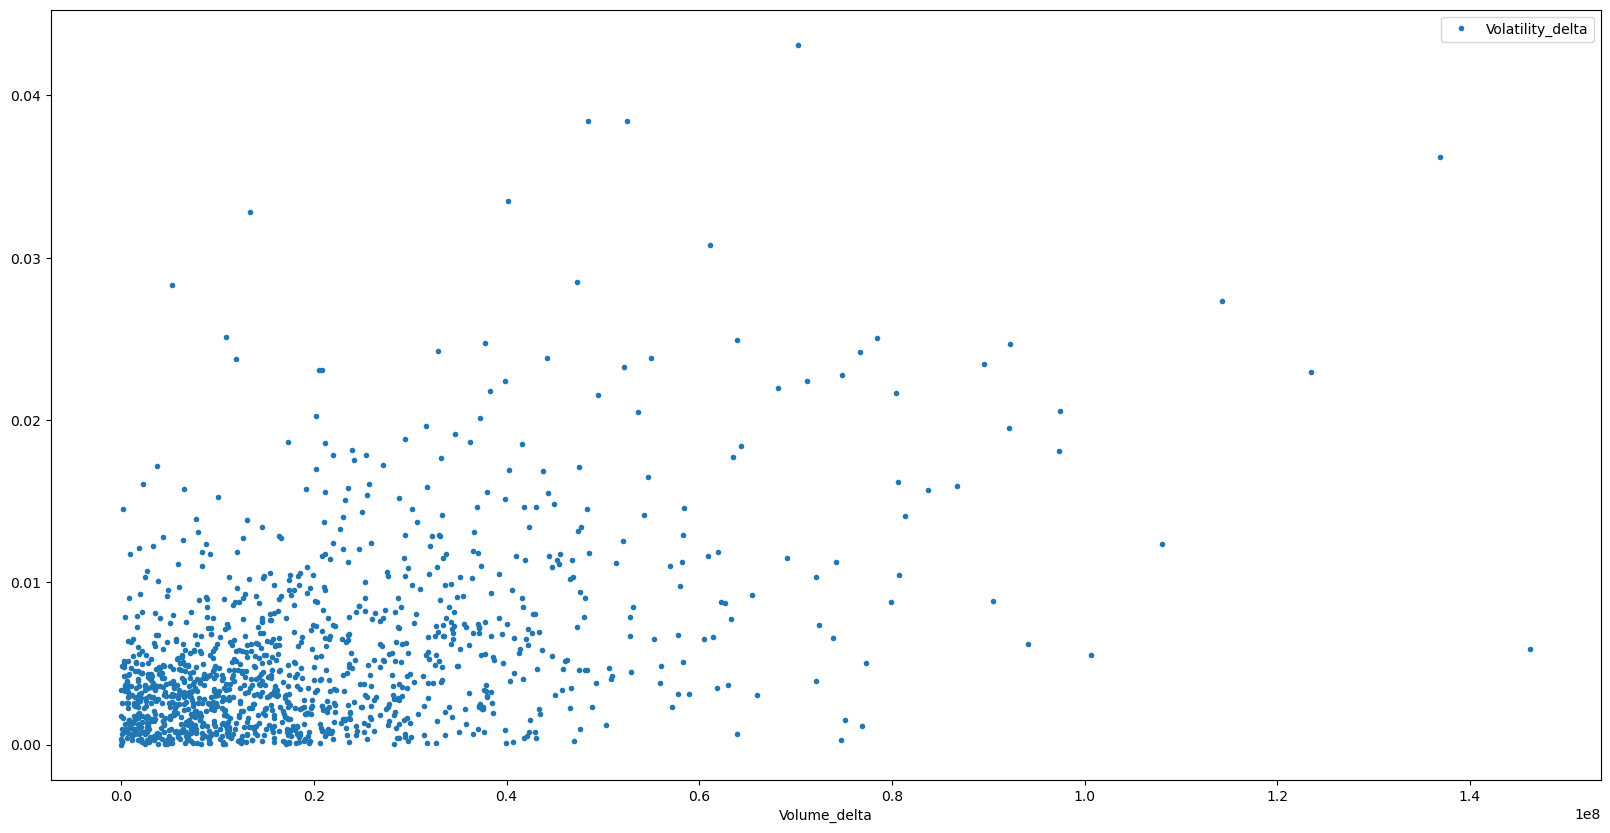

In [18]:
plot(df1)

In [19]:
error(df1,slope,intercept)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2018-11-02,274.750000,275.230011,269.589996,271.890015,250.119980,122634100,0.020744,0,0.000000,0.019608,5.473809
1,2018-11-05,272.440002,274.010010,271.350006,273.390015,251.499863,65622500,0.009730,57011600,0.011014,0.012418,27.632966
2,2018-11-06,273.320007,275.299988,273.250000,275.119995,253.091263,60085900,0.007451,5536600,0.002278,0.010857,45.703572
3,2018-11-07,277.559998,281.100006,277.079987,281.010010,258.509705,102752100,0.014306,42666200,0.006854,0.015283,6.835064
4,2018-11-08,280.109985,281.220001,279.220001,280.500000,258.040619,65584900,0.007130,37167200,0.007175,0.010477,46.945010


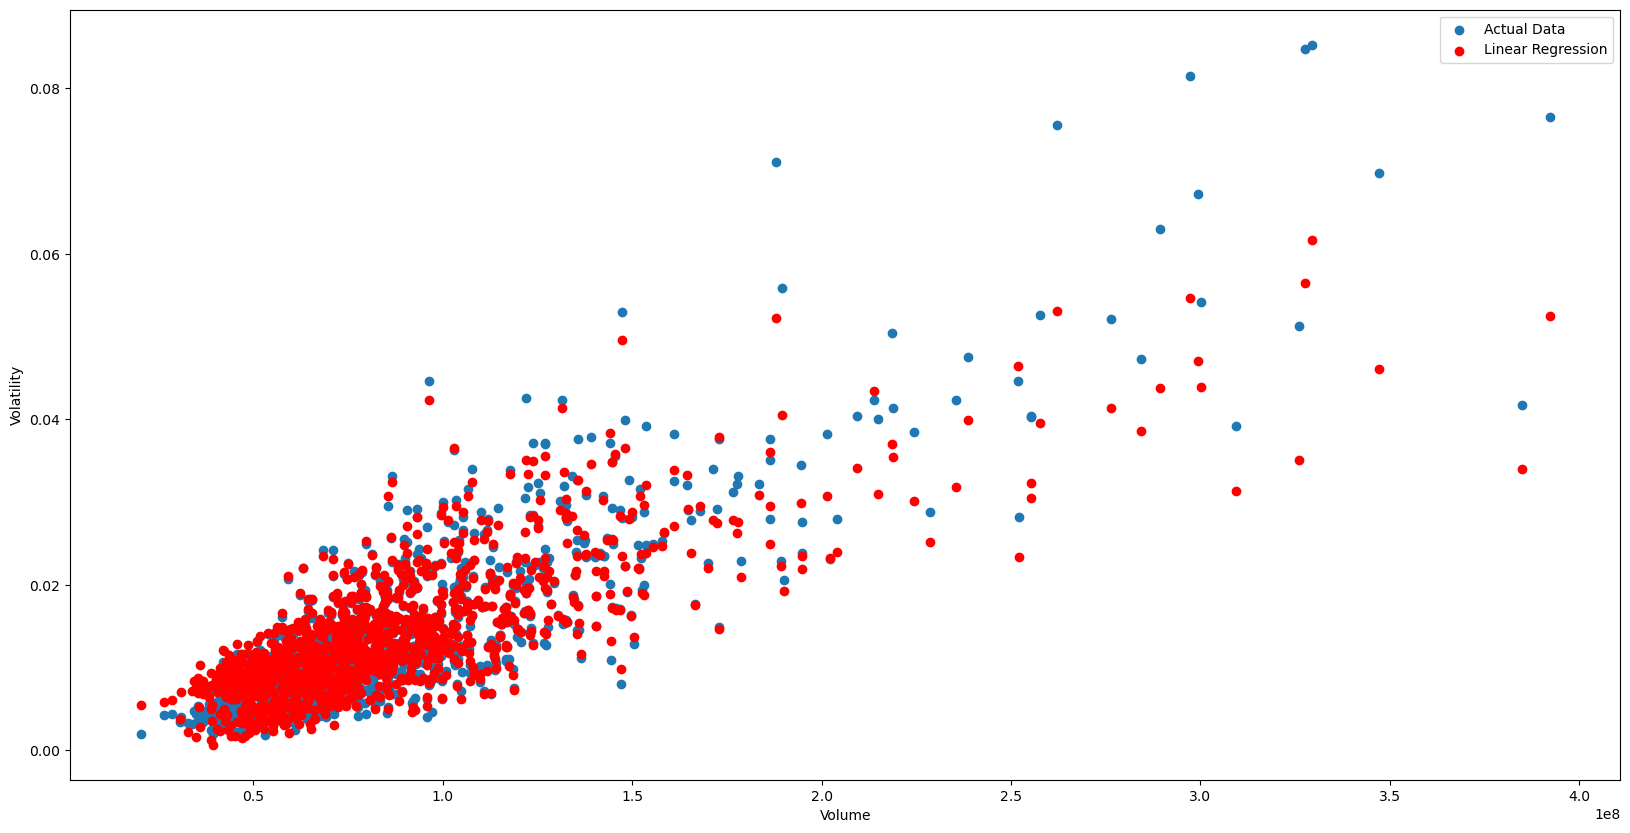

In [20]:
plot(df1)

## Other ETFs

### Invesco QQQ Trust (QQQ)

In [21]:
df2=pd.read_csv("QQQ.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,399.049988,401.940002,396.880005,401.679993,397.005035,40575900
1,2022-01-04,402.239990,402.279999,393.290009,396.470001,391.855652,58027200
2,2022-01-05,394.739990,395.890015,384.029999,384.290009,379.817444,75739800
3,2022-01-06,382.420013,387.350006,380.130005,384.019989,379.550537,70814300
4,2022-01-07,384.029999,385.760010,378.040009,379.859985,375.438965,72652300


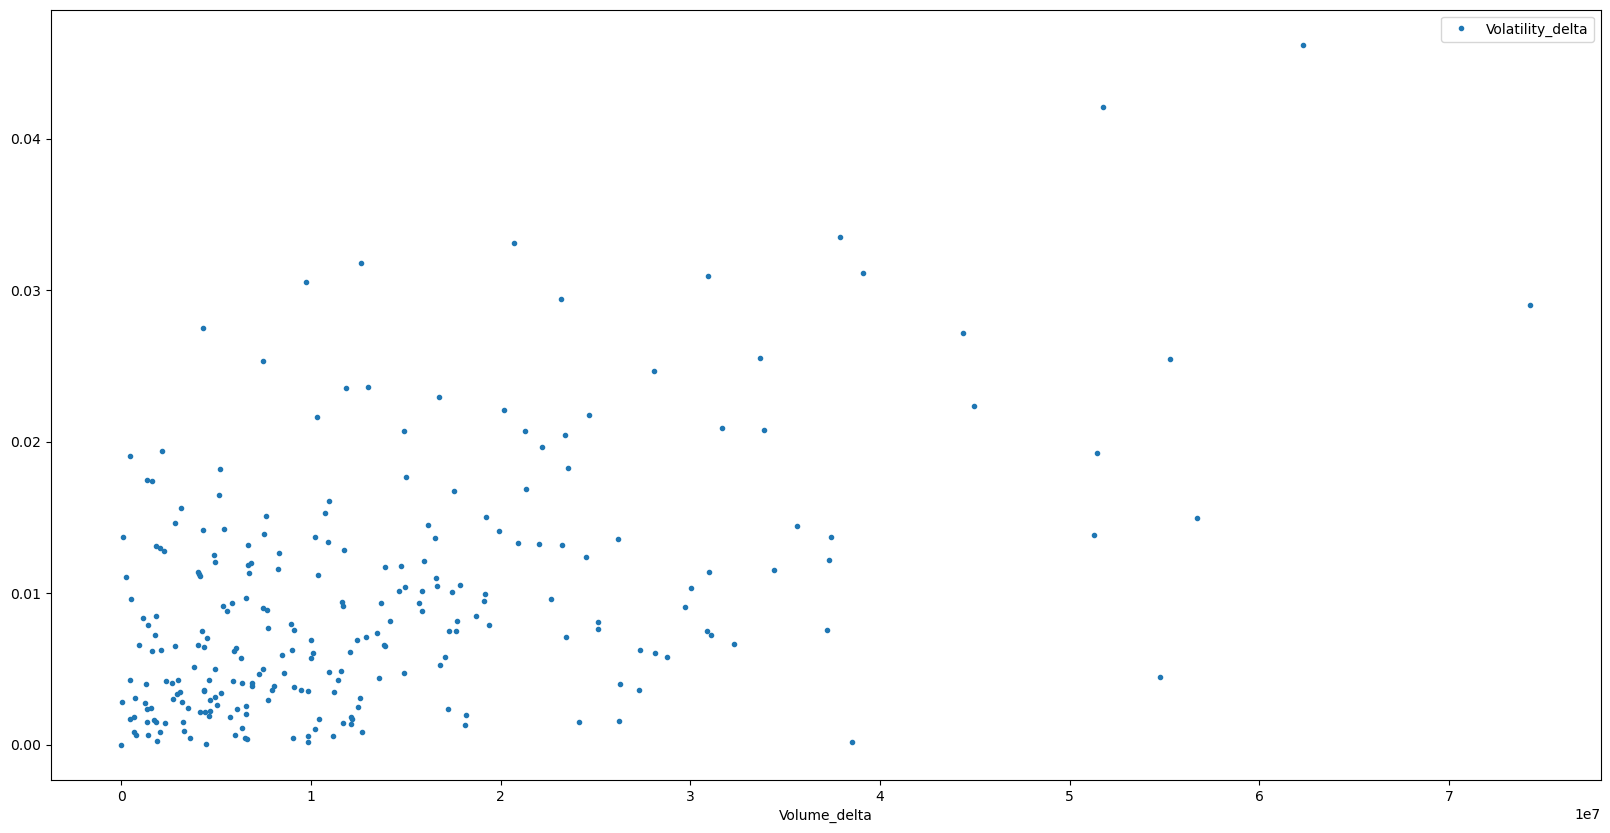

In [22]:
plot(df2)

In [23]:
slope2,intercept2=predict(df2)
error(df2,slope2,intercept2)
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2022-01-03,399.049988,401.940002,396.880005,401.679993,397.005035,40575900,0.012597,0,0.000000,0.009772,22.424034
1,2022-01-04,402.239990,402.279999,393.290009,396.470001,391.855652,58027200,0.022675,17451300,0.010078,0.022716,0.179932
2,2022-01-05,394.739990,395.890015,384.029999,384.290009,379.817444,75739800,0.030862,17712600,0.008187,0.032795,6.261964
3,2022-01-06,382.420013,387.350006,380.130005,384.019989,379.550537,70814300,0.018801,4925500,0.012061,0.017866,4.973967
4,2022-01-07,384.029999,385.760010,378.040009,379.859985,375.438965,72652300,0.020323,1838000,0.001522,0.019811,2.519325


#### Equation

In [24]:
equation(slope2,intercept2)

The equation is: Volatility = -5.245543307098316e-12 * Volume + 0.003210654225235713 *High + -0.0031894477376300198 *Low + -9.470187586839605e-05 *Close + 0.023362670184463627


'Volatility = -5.245543307098316e-12 * Volume + 0.003210654225235713 *High + -0.0031894477376300198 *Low + -9.470187586839605e-05 *Close + 0.023362670184463627'

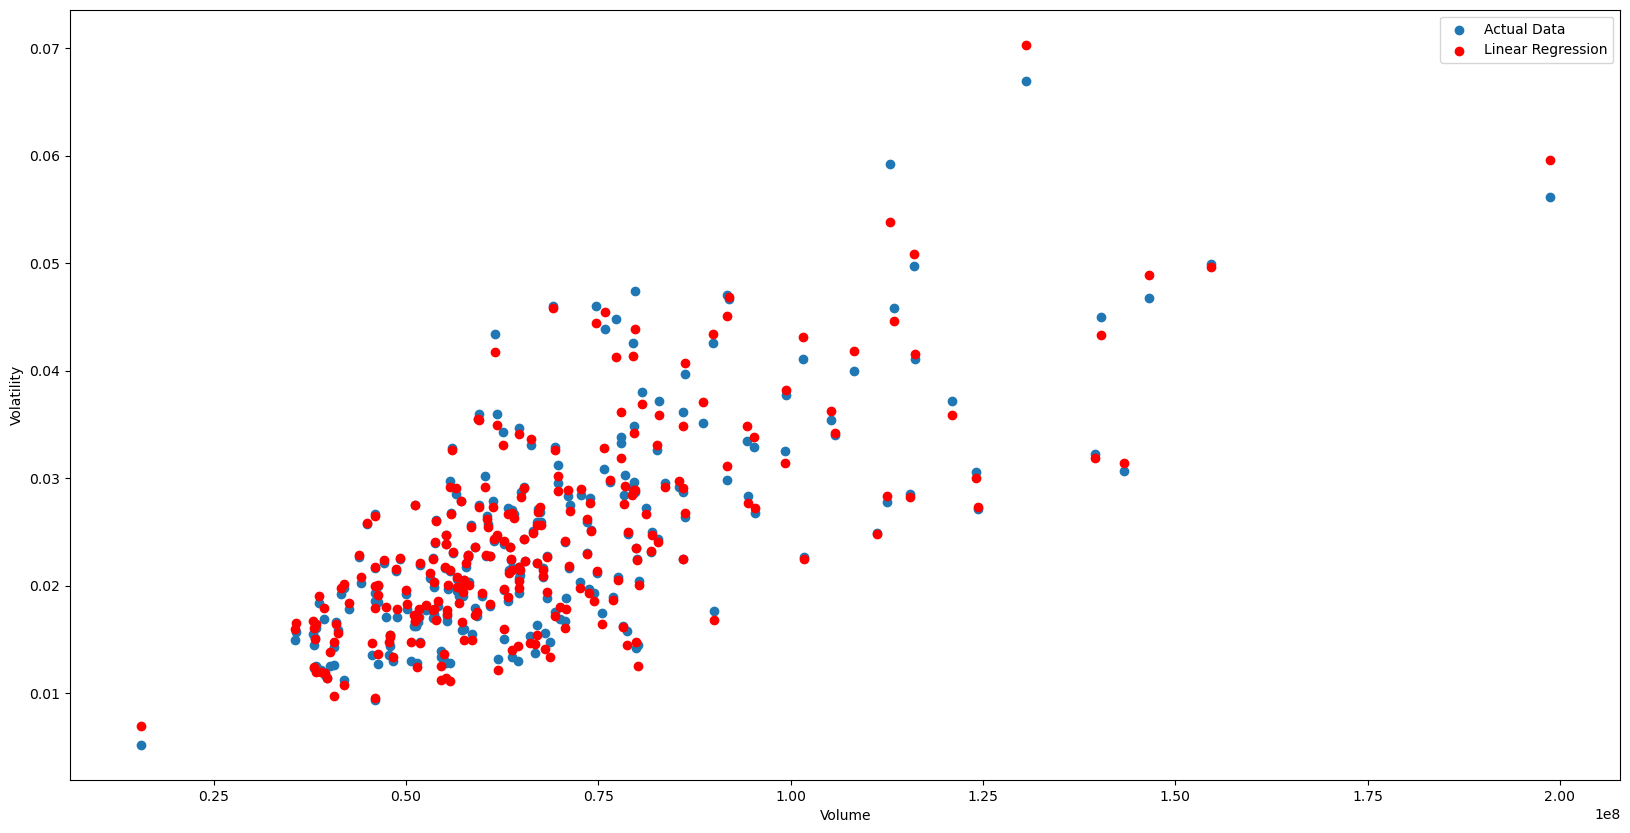

In [25]:
plot(df2)

#### 5Y data

In [26]:
df25=pd.read_csv("QQQ-5Y.csv")
df25.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,169.600006,169.660004,167.080002,168.960007,163.433777,39573500
1,2018-11-06,168.970001,171.190002,168.720001,170.240005,164.671936,34410400
2,2018-11-07,172.279999,175.580002,171.869995,175.580002,169.837311,51169600
3,2018-11-08,174.759995,175.300003,173.630005,174.460007,168.753922,40296500
4,2018-11-09,172.830002,173.250000,170.160004,171.520004,165.910049,50602700


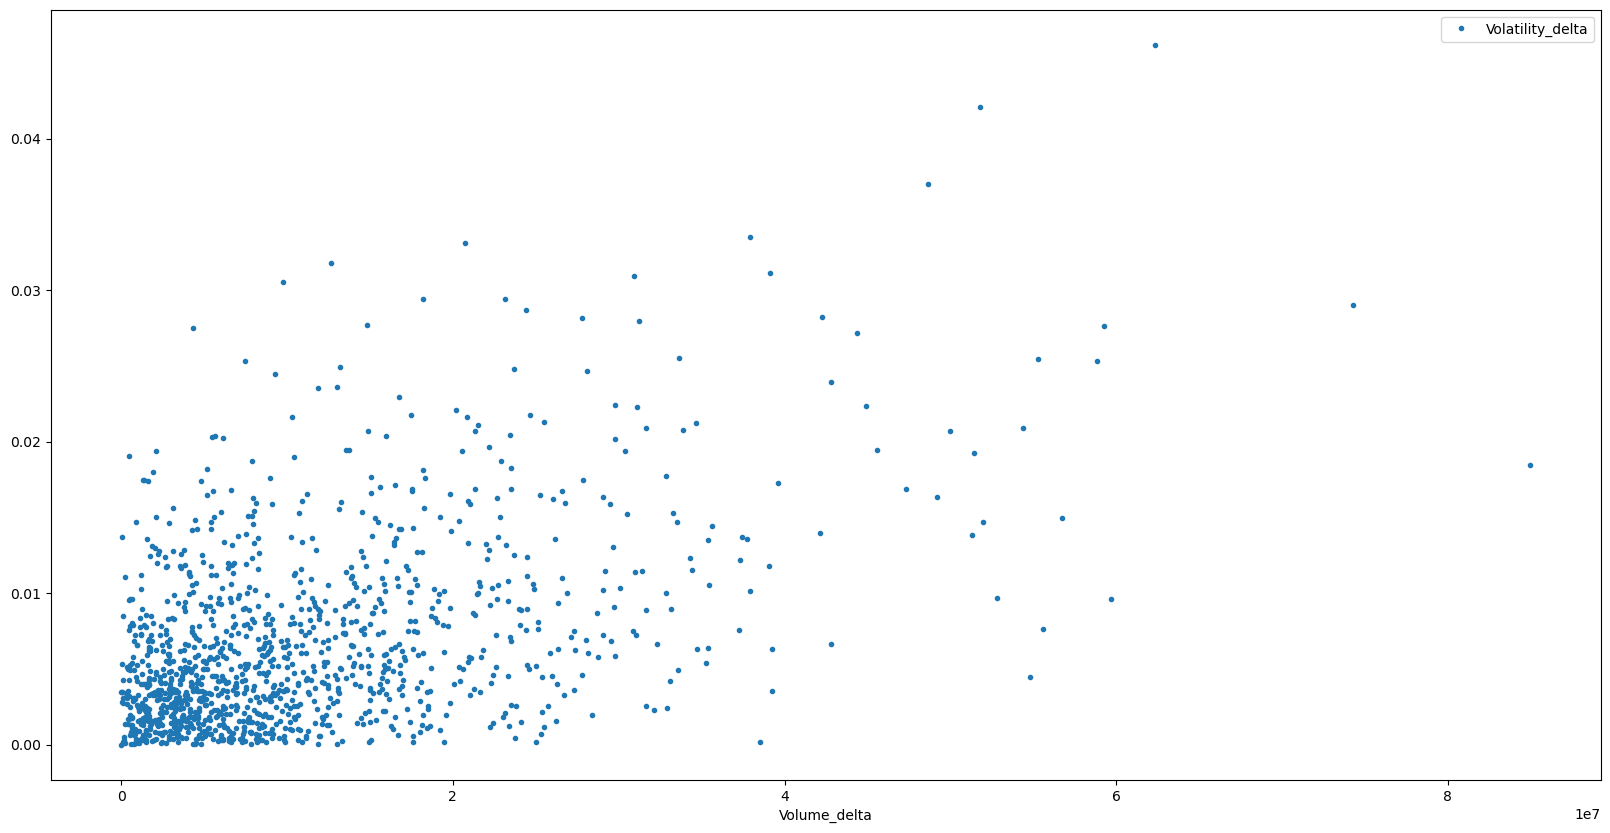

In [27]:
plot(df25)

In [28]:
error(df25,slope2,intercept2)
df25.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2018-11-05,169.600006,169.660004,167.080002,168.960007,163.433777,39573500,0.015270,0,0.000000,0.018981,24.302932
1,2018-11-06,168.970001,171.190002,168.720001,170.240005,164.671936,34410400,0.014509,5163100,0.000761,0.018568,27.979070
2,2018-11-07,172.279999,175.580002,171.869995,175.580002,169.837311,51169600,0.021130,16759200,0.006621,0.022023,4.225280
3,2018-11-08,174.759995,175.300003,173.630005,174.460007,168.753922,40296500,0.009572,10873100,0.011558,0.015673,63.736365
4,2018-11-09,172.830002,173.250000,170.160004,171.520004,165.910049,50602700,0.018015,10306200,0.008443,0.020383,13.144345


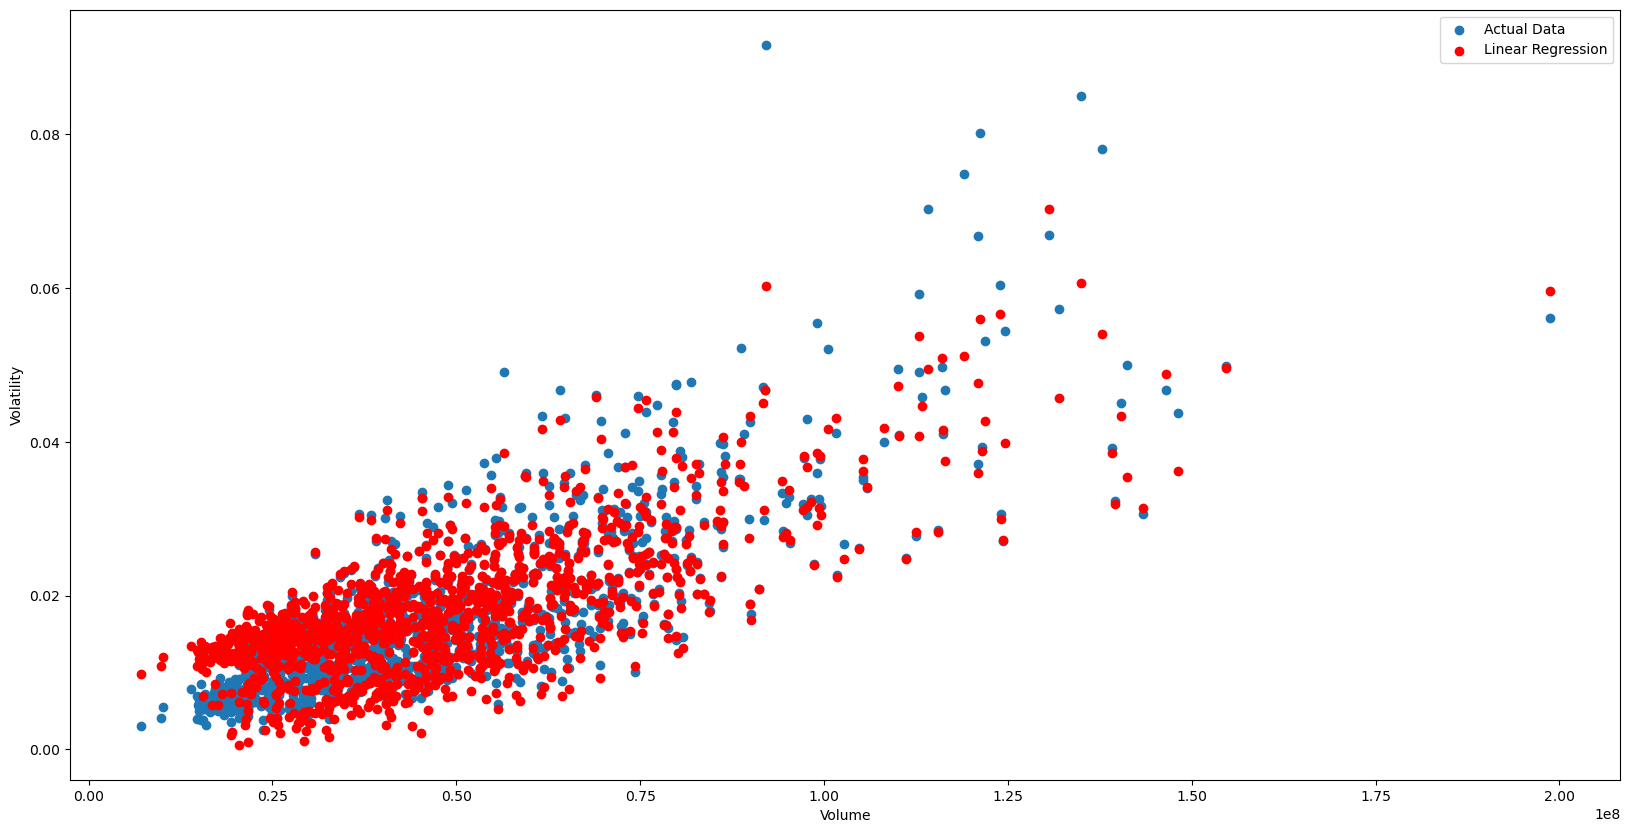

In [29]:
plot(df25)

### Vanguard Developed Markets Index Fund (VEA)

In [30]:
df3=pd.read_csv('VEA.csv')
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,51.310001,51.400002,51.110001,51.369999,48.901279,15874300
1,2022-01-04,51.639999,51.759998,51.459999,51.560001,49.082150,15991500
2,2022-01-05,51.740002,51.799999,51.090000,51.110001,48.653778,13855400
3,2022-01-06,50.910000,51.070000,50.470001,50.830002,48.387226,17111300
4,2022-01-07,50.810001,51.110001,50.650002,51.040001,48.587139,12525300


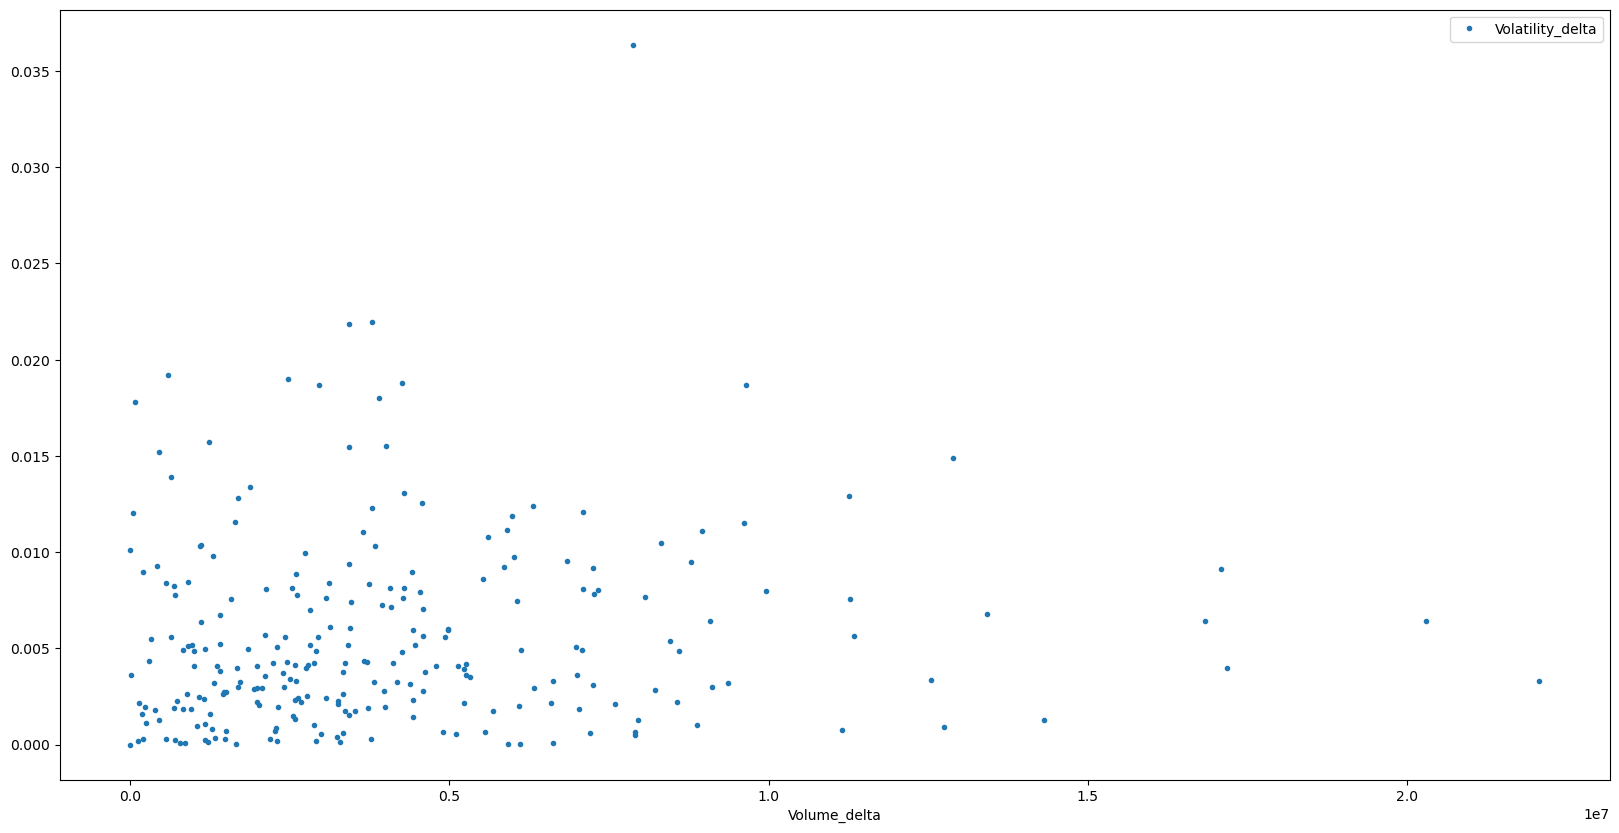

In [31]:
plot(df3)

In [32]:
slope3,intercept3=predict(df3)
error(df3,slope3,intercept3)
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2022-01-03,51.310001,51.400002,51.110001,51.369999,48.901279,15874300,0.005645,0,0.000000,0.004215,25.337567
1,2022-01-04,51.639999,51.759998,51.459999,51.560001,49.082150,15991500,0.005818,117200,0.000173,0.004358,25.105712
2,2022-01-05,51.740002,51.799999,51.090000,51.110001,48.653778,13855400,0.013892,2136100,0.008073,0.014036,1.042901
3,2022-01-06,50.910000,51.070000,50.470001,50.830002,48.387226,17111300,0.011804,3255900,0.002088,0.011595,1.771749
4,2022-01-07,50.810001,51.110001,50.650002,51.040001,48.587139,12525300,0.009013,4586000,0.002792,0.008328,7.600280


#### Equation

In [33]:
equation(slope3,intercept3)

The equation is: Volatility = -1.039729320033439e-11 * Volume + 0.02323270460807233 *High + -0.023402729273662007 *Low + -0.00015167097943369335 *Close + 0.014123787639873394


'Volatility = -1.039729320033439e-11 * Volume + 0.02323270460807233 *High + -0.023402729273662007 *Low + -0.00015167097943369335 *Close + 0.014123787639873394'

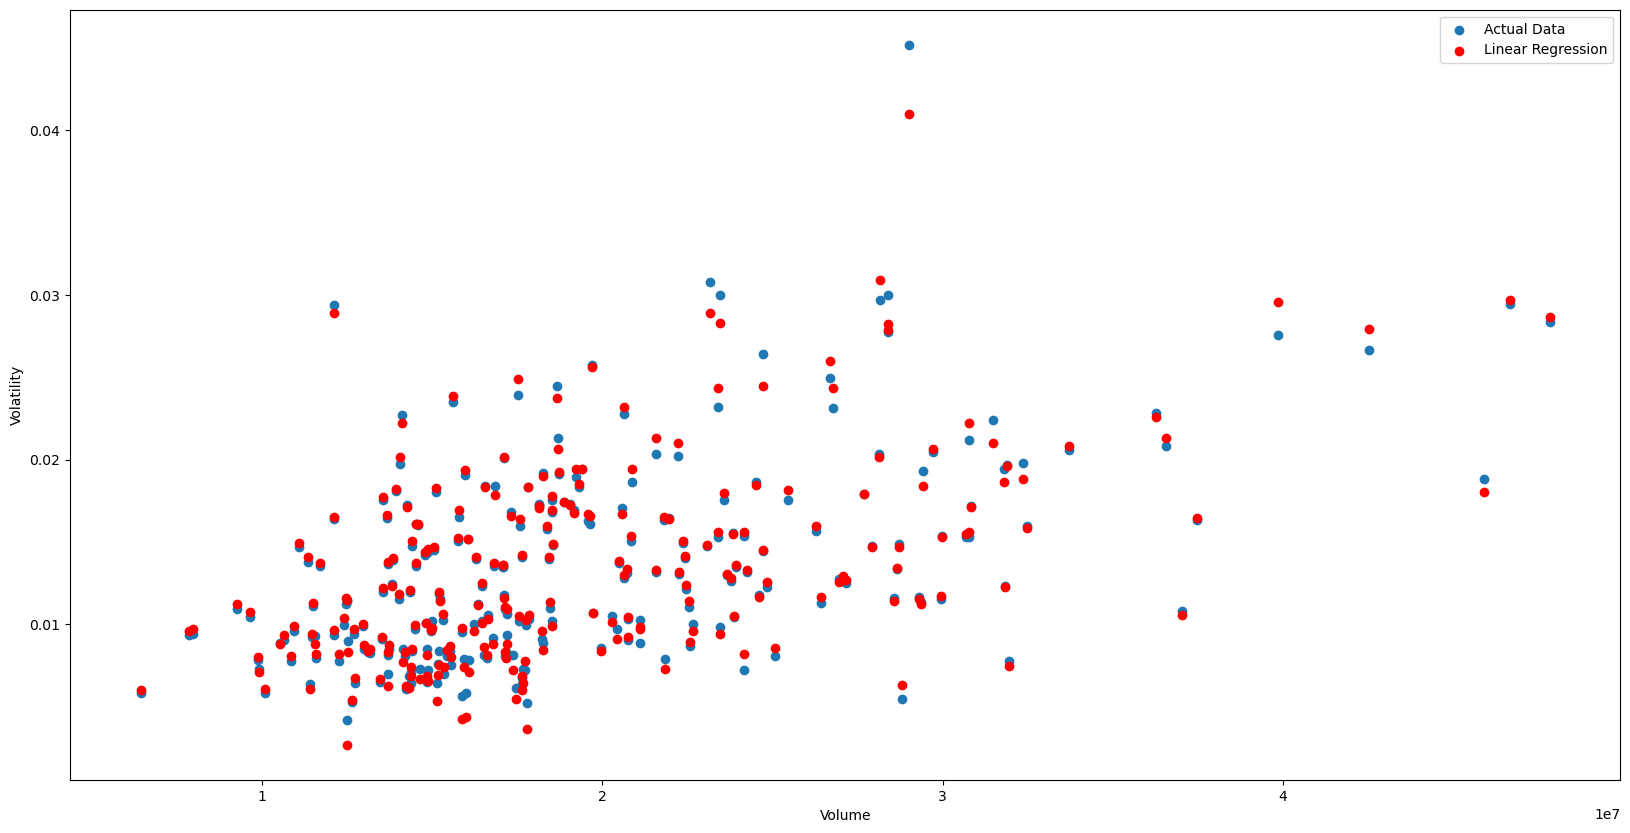

In [34]:
plot(df3)

#### 5Y Data

In [35]:
df35=pd.read_csv('VEA-5Y.csv')
df35.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,40.150002,40.270000,40.040001,40.160000,34.657158,10887600
1,2018-11-06,40.200001,40.369999,40.150002,40.369999,34.838383,9456900
2,2018-11-07,40.709999,40.889999,40.570000,40.869999,35.269863,10109900
3,2018-11-08,40.669998,40.770000,40.349998,40.459999,34.916046,11523800
4,2018-11-09,40.180000,40.240002,39.970001,40.169998,34.665783,12446100


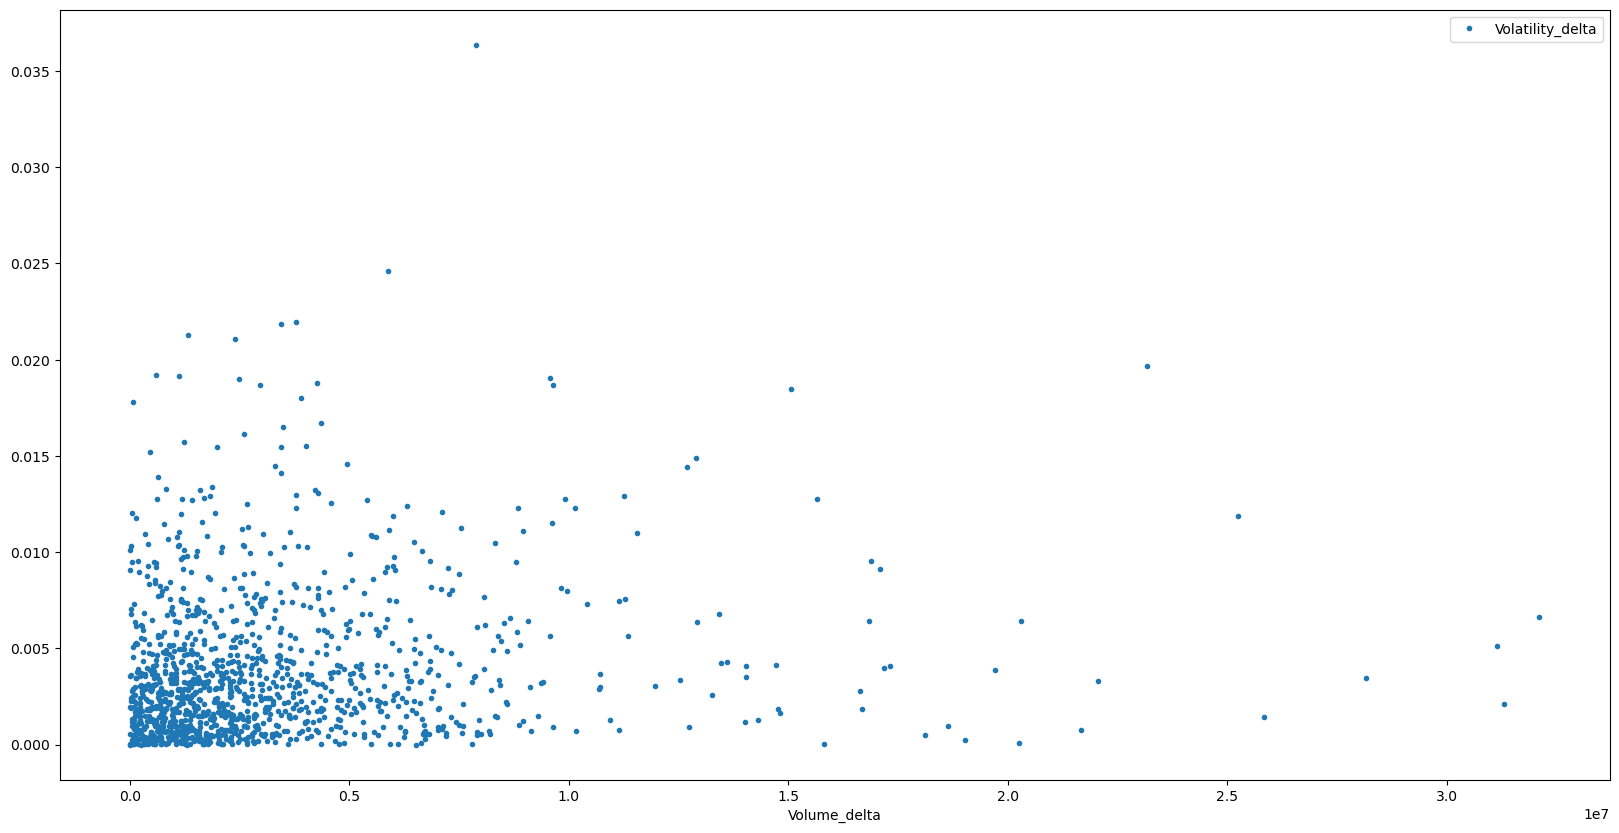

In [36]:
plot(df35)

In [37]:
error(df35,slope3,intercept3)
df35.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2018-11-05,40.150002,40.270000,40.040001,40.160000,34.657158,10887600,0.005727,0,0.000000,0.006455,12.713731
1,2018-11-06,40.200001,40.369999,40.150002,40.369999,34.838383,9456900,0.005450,1430700,0.000278,0.006187,13.535543
2,2018-11-07,40.709999,40.889999,40.570000,40.869999,35.269863,10109900,0.007830,653000,0.002380,0.008356,6.727493
3,2018-11-08,40.669998,40.770000,40.349998,40.459999,34.916046,11523800,0.010381,1413900,0.002551,0.010765,3.698976
4,2018-11-09,40.180000,40.240002,39.970001,40.169998,34.665783,12446100,0.006721,922300,0.003659,0.007379,9.778639


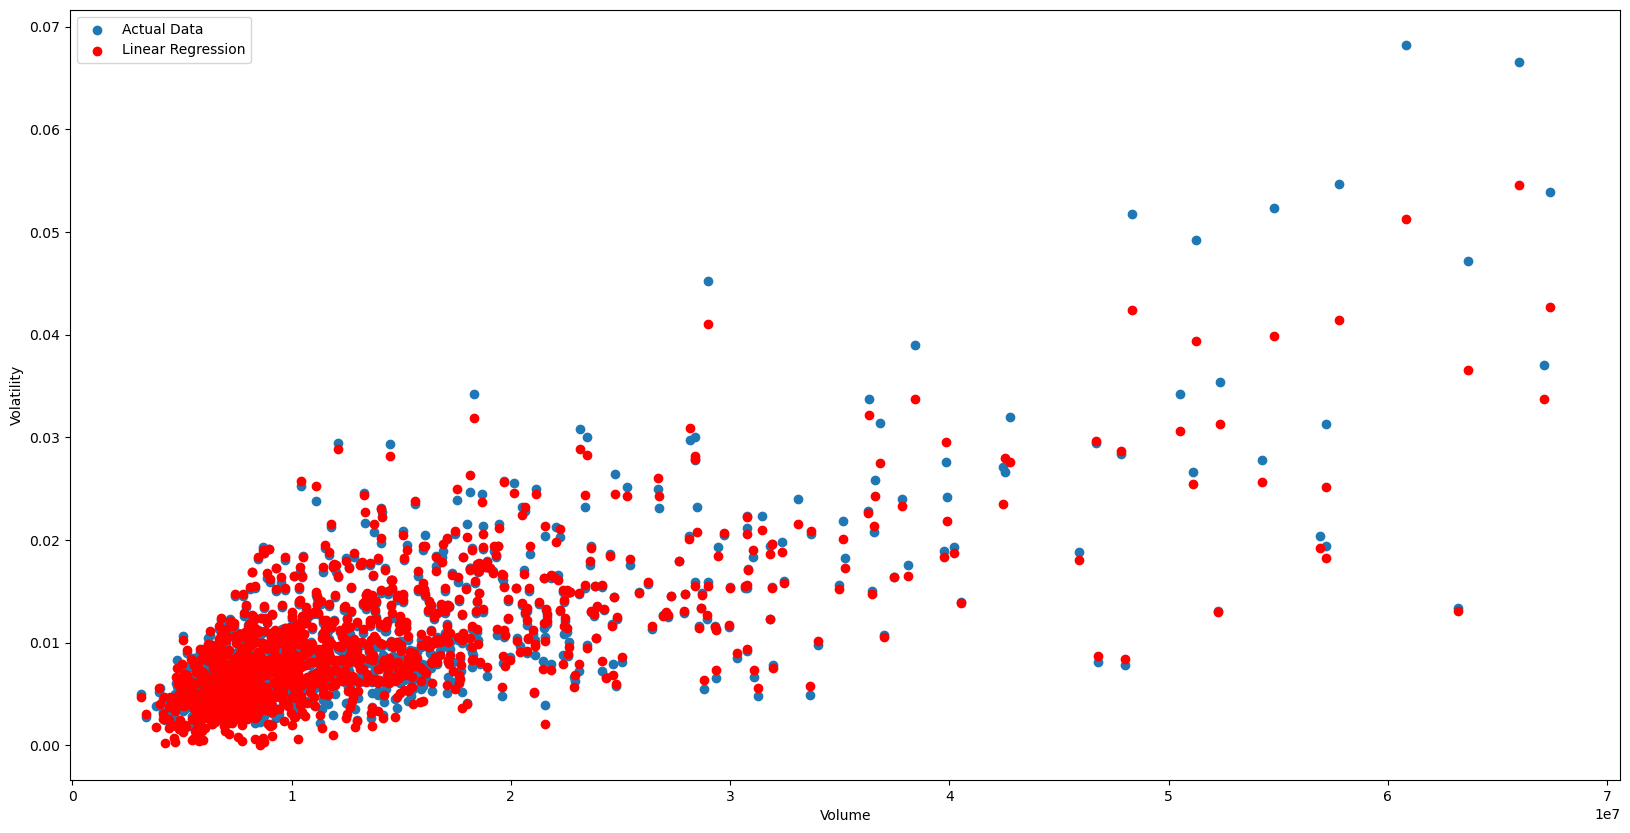

In [38]:
plot(df35)

## Stocks

### Google

In [39]:
df4=pd.read_csv('GOOG.csv')
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000
1,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000
2,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000
3,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000
4,2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000


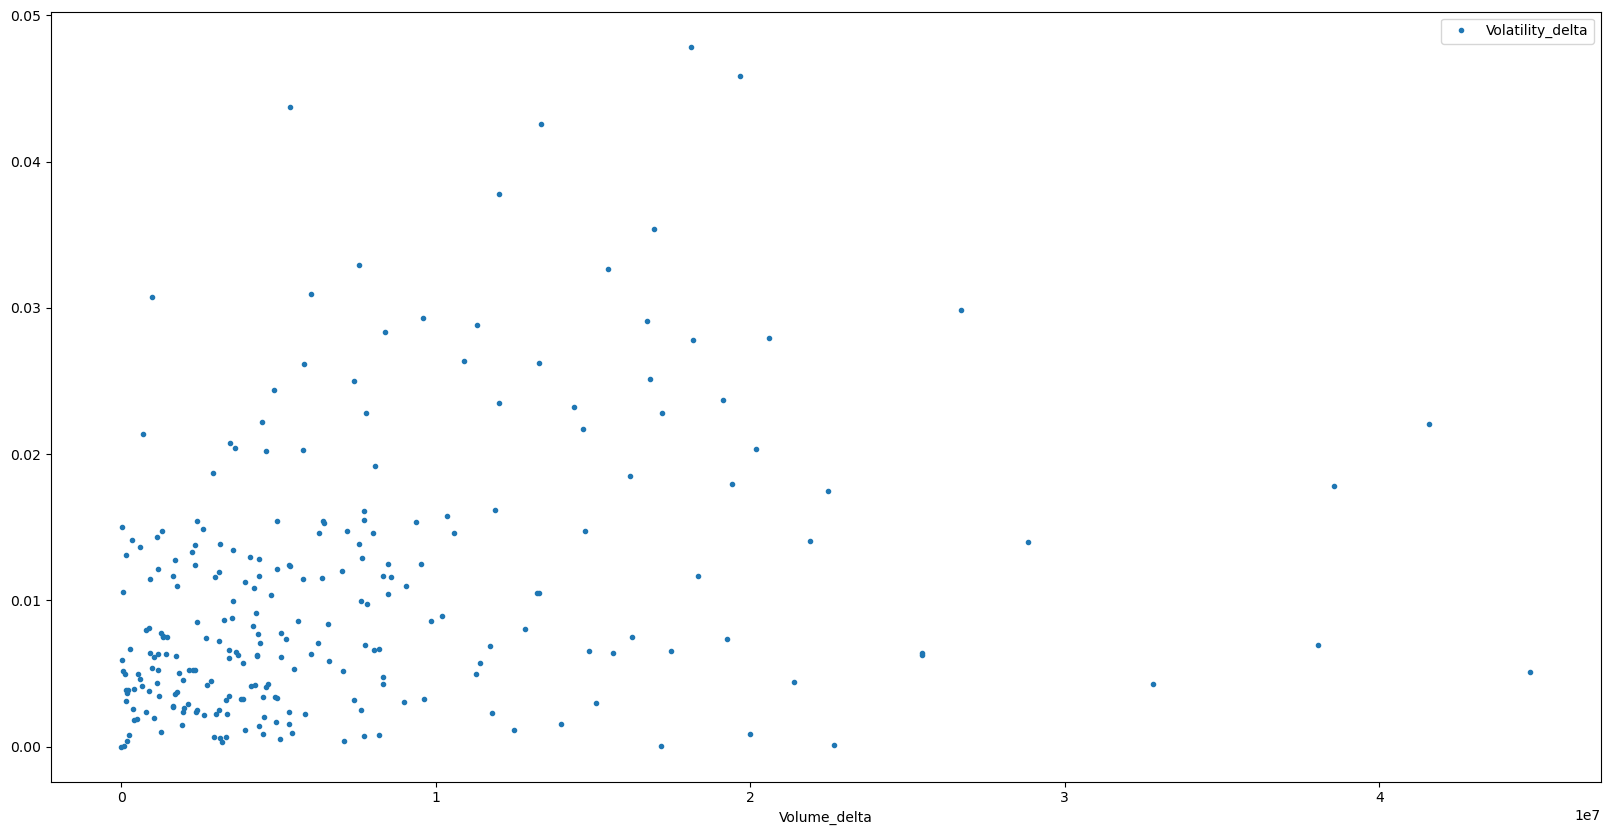

In [40]:
plot(df4)

In [41]:
slope4,intercept4=predict(df4)
error(df4,slope4,intercept4)
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000,0.014113,0,0.000000,0.011244,20.328473
1,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000,0.019346,2286000,0.005232,0.017746,8.268527
2,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000,0.049214,26714000,0.029868,0.053037,7.766927
3,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000,0.021247,20592000,0.027968,0.020417,3.905888
4,2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000,0.017998,9642000,0.003249,0.016673,7.359057


#### Equation

In [42]:
equation(slope4,intercept4)

The equation is: Volatility = -1.0776005675976258e-12 * Volume + 0.008476625027730873 *High + -0.008455697716604427 *Low + -0.0002526111880723065 *Close + 0.027559988728813815


'Volatility = -1.0776005675976258e-12 * Volume + 0.008476625027730873 *High + -0.008455697716604427 *Low + -0.0002526111880723065 *Close + 0.027559988728813815'

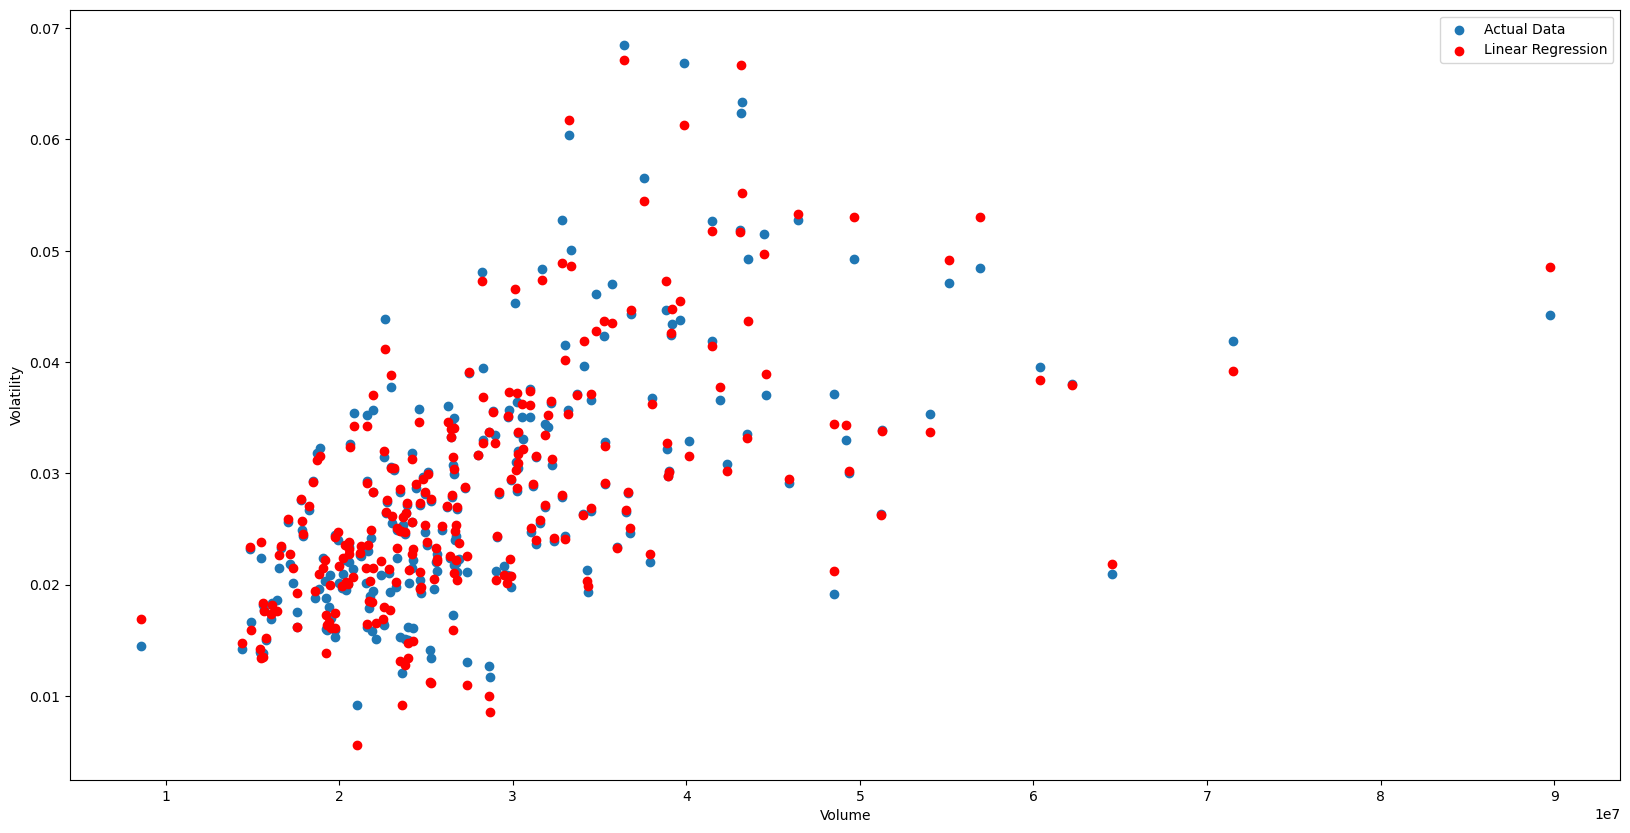

In [43]:
plot(df4)

#### 5Y Data

In [44]:
df45=pd.read_csv('GOOG-5Y.csv')
df45.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,52.750000,52.923500,51.062000,52.004501,52.004501,48828000
1,2018-11-06,51.973999,53.217251,51.903500,52.790501,52.790501,24666000
2,2018-11-07,53.450001,54.772999,53.294998,54.669498,54.669498,41168000
3,2018-11-08,54.569000,54.663502,53.610249,54.119999,54.119999,29764000
4,2018-11-09,53.699501,53.778000,52.655499,53.307499,53.307499,26864000


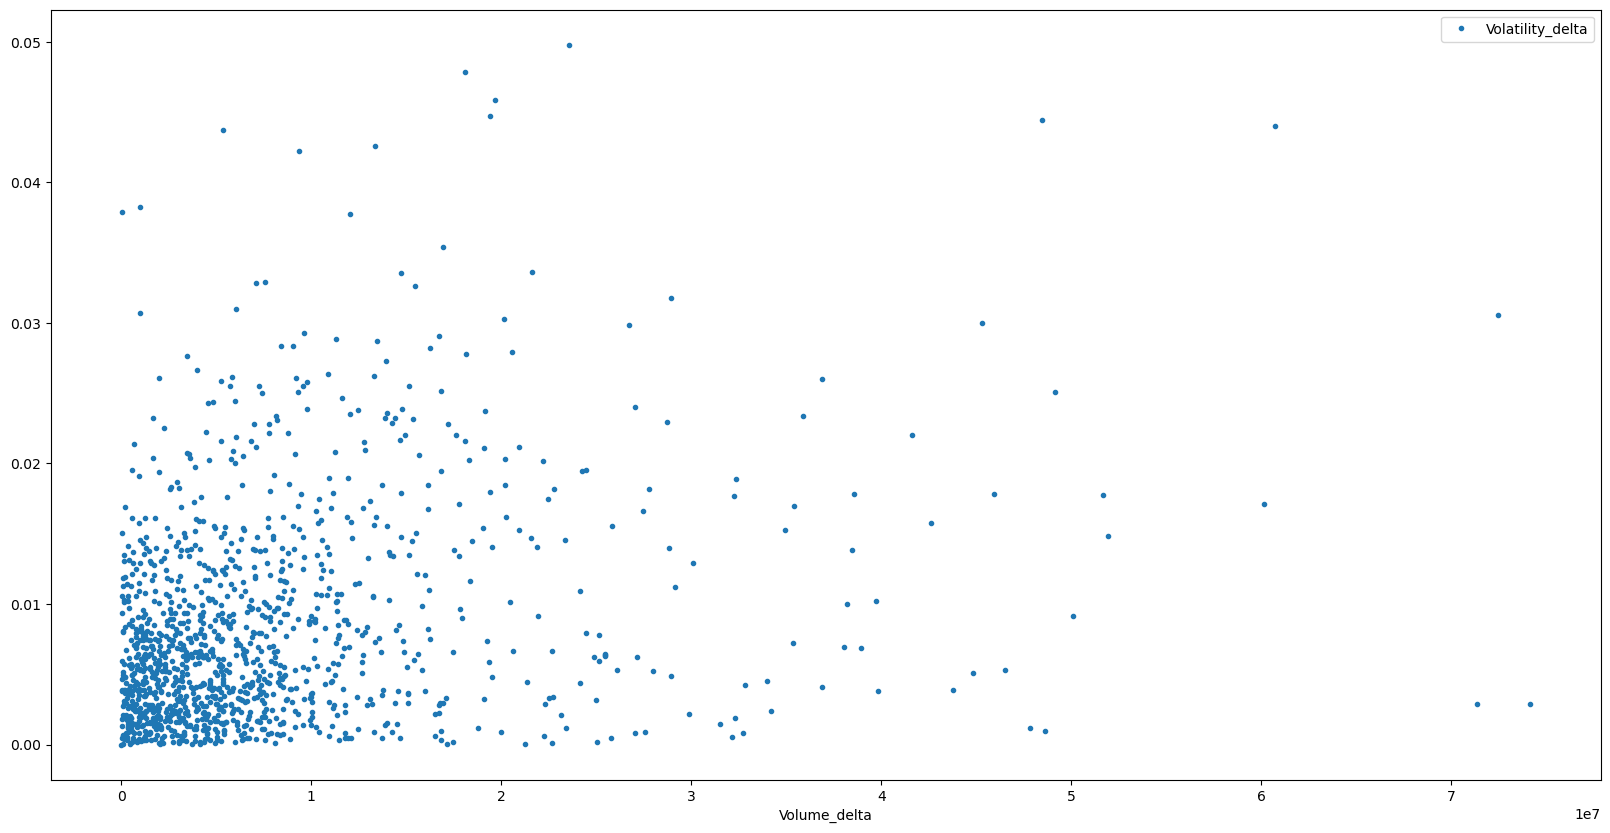

In [45]:
plot(df45)

In [46]:
error(df45,slope4,intercept4)
df45.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2018-11-05,52.750000,52.923500,51.062000,52.004501,52.004501,48828000,0.035795,0,0.000000,0.031218,12.785866
1,2018-11-06,51.973999,53.217251,51.903500,52.790501,52.790501,24666000,0.024886,24162000,0.010909,0.026420,6.164832
2,2018-11-07,53.450001,54.772999,53.294998,54.669498,54.669498,41168000,0.027035,16502000,0.002149,0.027349,1.161734
3,2018-11-08,54.569000,54.663502,53.610249,54.119999,54.119999,29764000,0.019461,11404000,0.007574,0.023907,22.840599
4,2018-11-09,53.699501,53.778000,52.655499,53.307499,53.307499,26864000,0.021057,2900000,0.001596,0.024682,17.214312


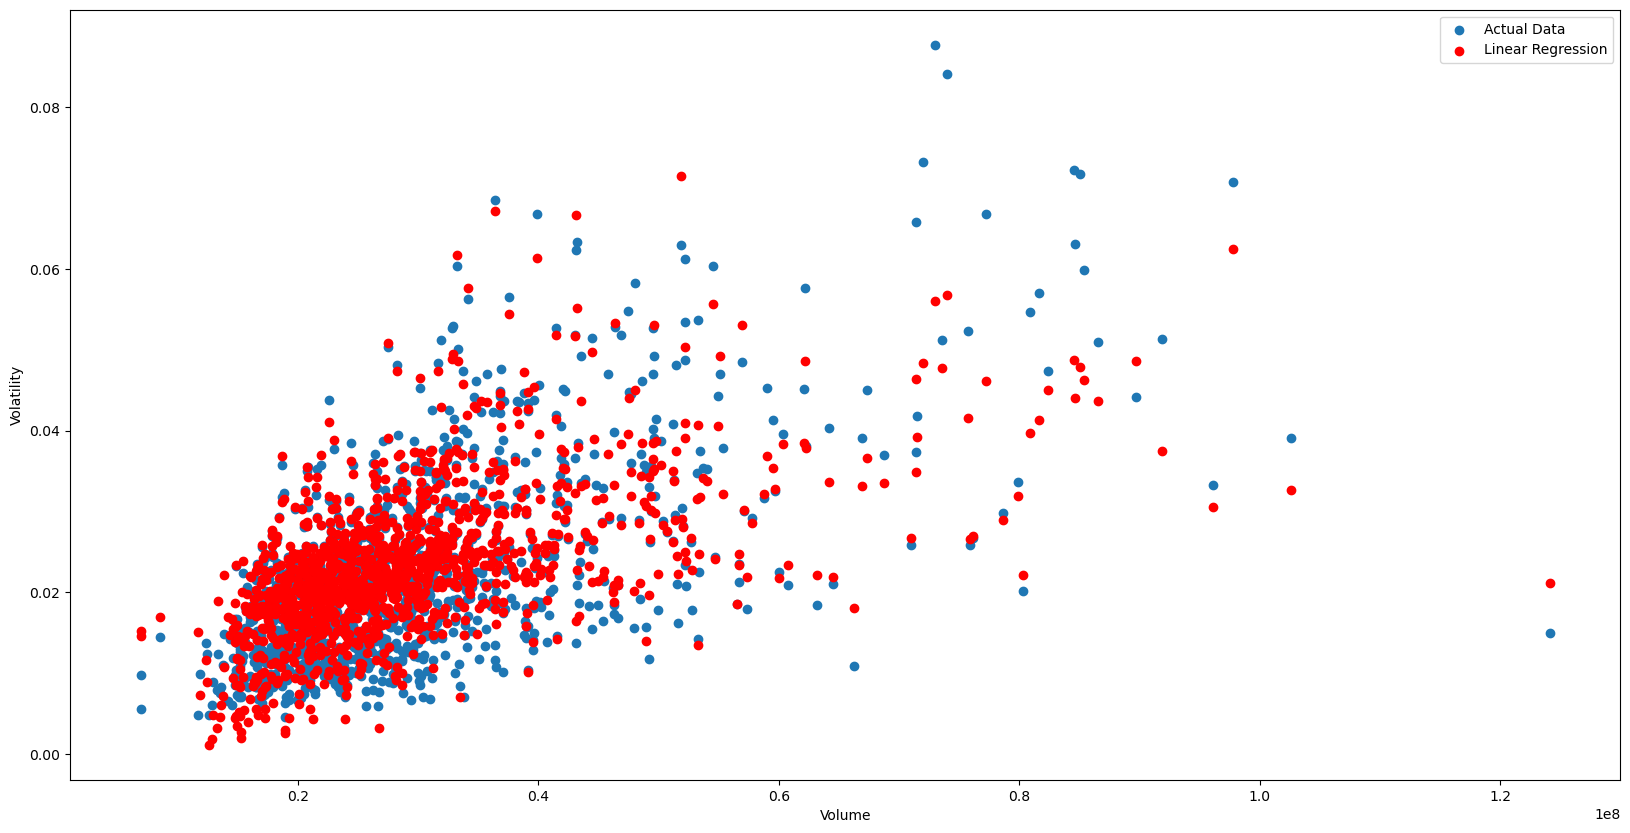

In [47]:
plot(df45)

### Microsoft

In [48]:
df5=pd.read_csv('MSFT.csv')
df5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,335.350006,338.000000,329.779999,334.750000,329.394897,28865100
1,2022-01-04,334.829987,335.200012,326.119995,329.010010,323.746674,32674300
2,2022-01-05,325.859985,326.070007,315.980011,316.380005,311.318726,40054300
3,2022-01-06,313.149994,318.700012,311.489990,313.880005,308.858734,39646100
4,2022-01-07,314.149994,316.500000,310.089996,314.040009,309.016174,32720000


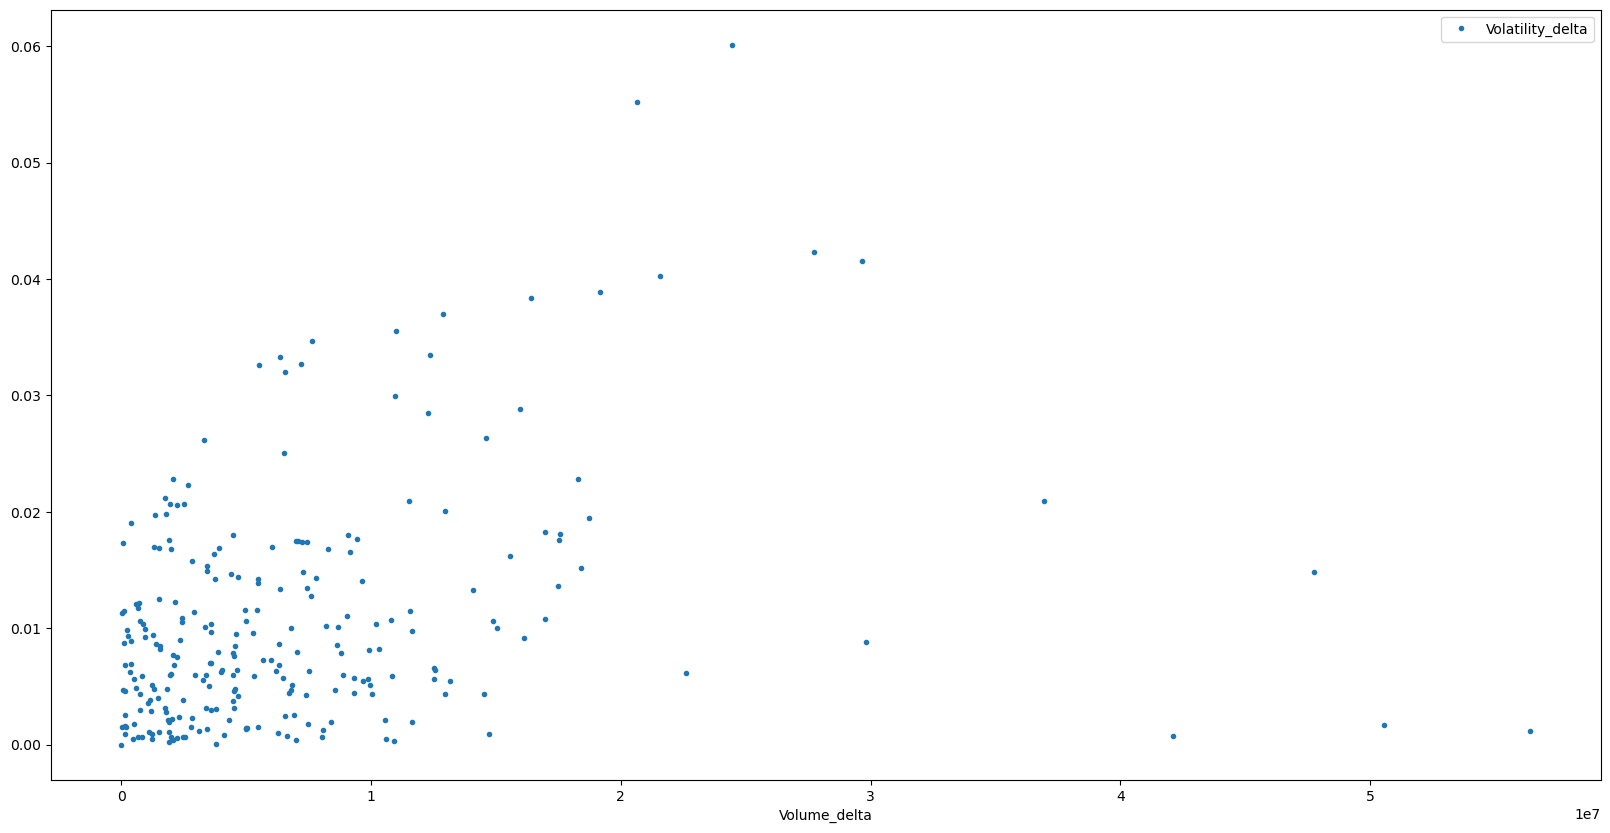

In [49]:
plot(df5)

In [50]:
slope5,intercept5=predict(df5)
error(df5,slope5,intercept5)
df5.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2022-01-03,335.350006,338.000000,329.779999,334.750000,329.394897,28865100,0.024556,0,0.000000,0.024176,1.544641
1,2022-01-04,334.829987,335.200012,326.119995,329.010010,323.746674,32674300,0.027598,3809200,0.003042,0.027918,1.158526
2,2022-01-05,325.859985,326.070007,315.980011,316.380005,311.318726,40054300,0.031892,7380000,0.004294,0.032862,3.042730
3,2022-01-06,313.149994,318.700012,311.489990,313.880005,308.858734,39646100,0.022971,408200,0.008921,0.022455,2.243638
4,2022-01-07,314.149994,316.500000,310.089996,314.040009,309.016174,32720000,0.020411,6926100,0.002559,0.019515,4.393822


#### Equation

In [51]:
equation(slope5,intercept5)

The equation is: Volatility = -8.086532144599405e-12 * Volume + 0.0036844714731903844 *High + -0.003663024781974365 *Low + -0.00011881118706875103 *Close + 0.026822759409960716


'Volatility = -8.086532144599405e-12 * Volume + 0.0036844714731903844 *High + -0.003663024781974365 *Low + -0.00011881118706875103 *Close + 0.026822759409960716'

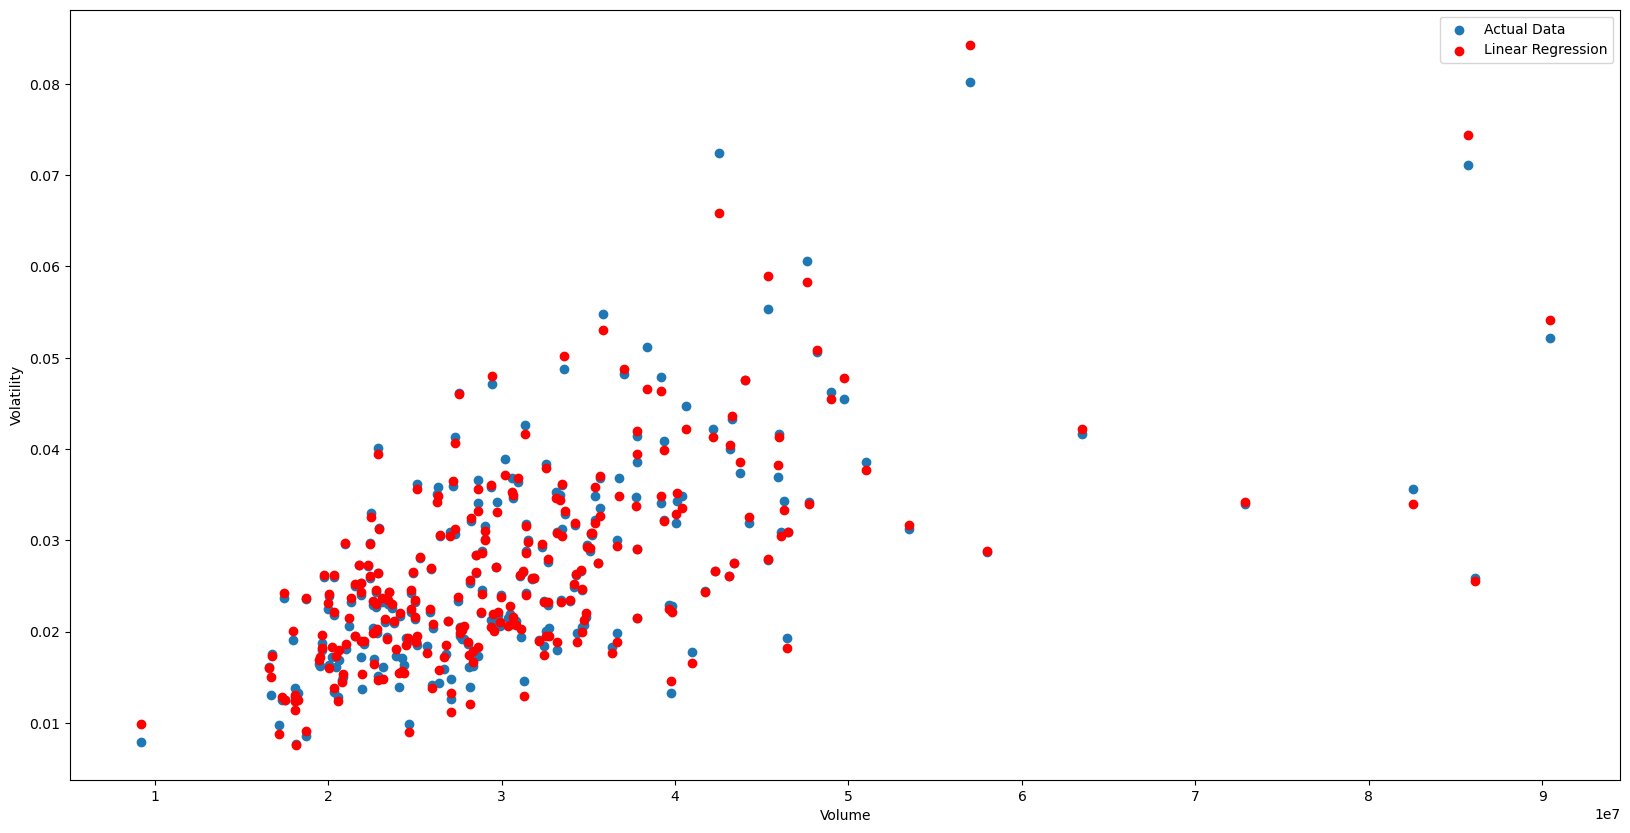

In [52]:
plot(df5)

### 5Y Data

In [53]:
df55=pd.read_csv('MSFT-5Y.csv')
df55.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,106.370003,107.739998,105.900002,107.510002,101.858360,27922100
1,2018-11-06,107.379997,108.839996,106.279999,107.720001,102.057320,24340200
2,2018-11-07,109.440002,112.239998,109.400002,111.959999,106.074432,37901700
3,2018-11-08,111.800003,112.209999,110.910004,111.750000,105.875465,25644100
4,2018-11-09,110.849998,111.449997,108.760002,109.570000,103.810074,32039200


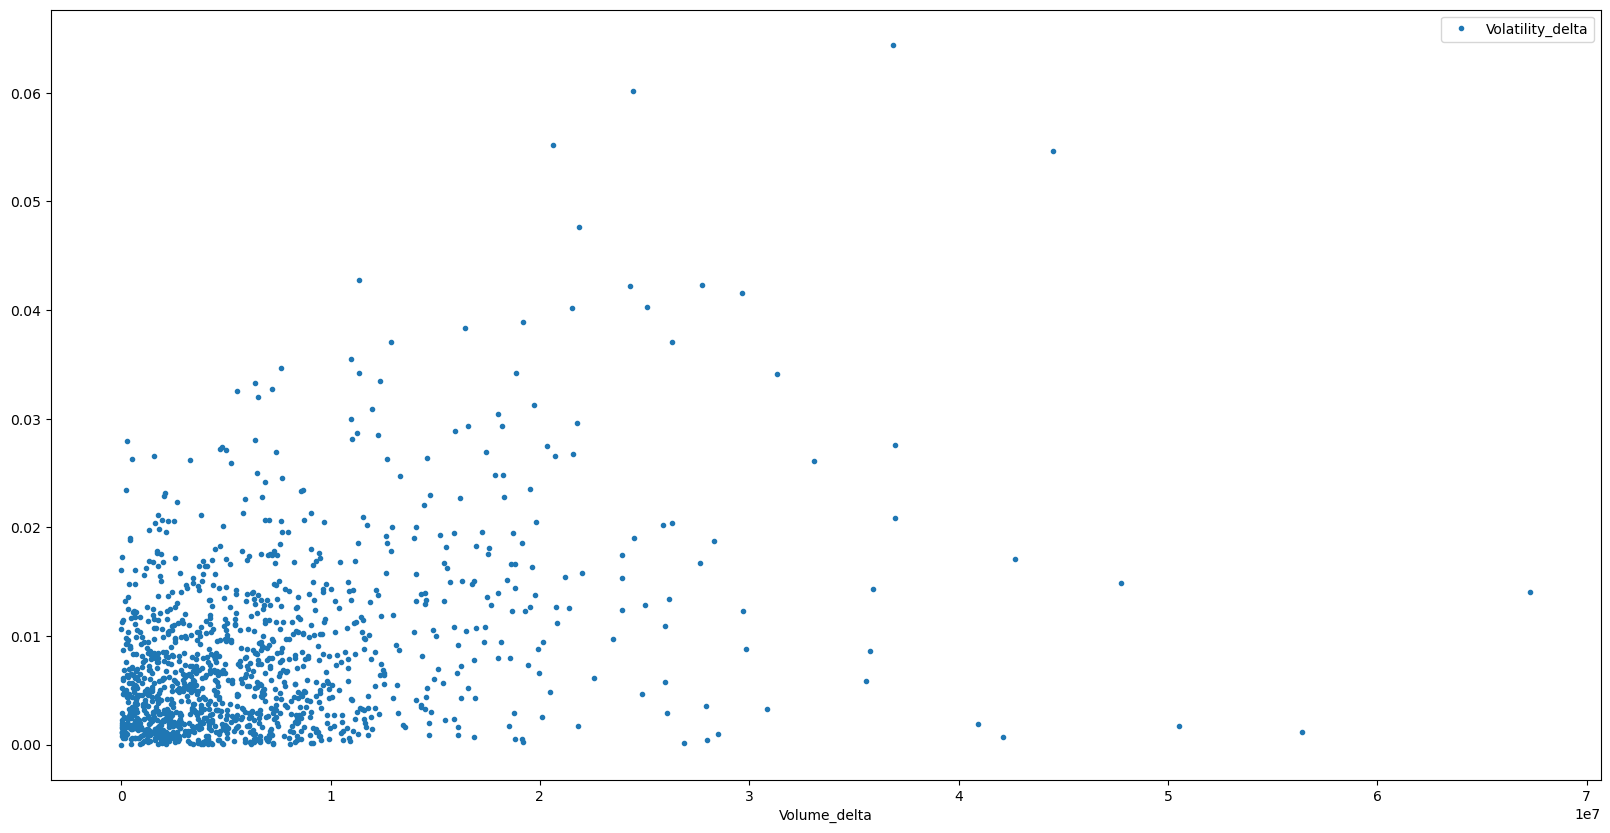

In [54]:
plot(df55)

In [55]:
error(df55,slope5,intercept5)
df55.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Predicted_Volatility,Percent_Error
0,2018-11-05,106.370003,107.739998,105.900002,107.510002,101.858360,27922100,0.017115,0,0.000000,0.022874,33.652710
1,2018-11-06,107.379997,108.839996,106.279999,107.720001,102.057320,24340200,0.023765,3581900,0.006651,0.025539,7.464211
2,2018-11-07,109.440002,112.239998,109.400002,111.959999,106.074432,37901700,0.025366,13561500,0.001601,0.026024,2.594603
3,2018-11-08,111.800003,112.209999,110.910004,111.750000,105.875465,25644100,0.011633,12257600,0.013733,0.020507,76.279293
4,2018-11-09,110.849998,111.449997,108.760002,109.570000,103.810074,32039200,0.024550,6395100,0.012917,0.025789,5.045987


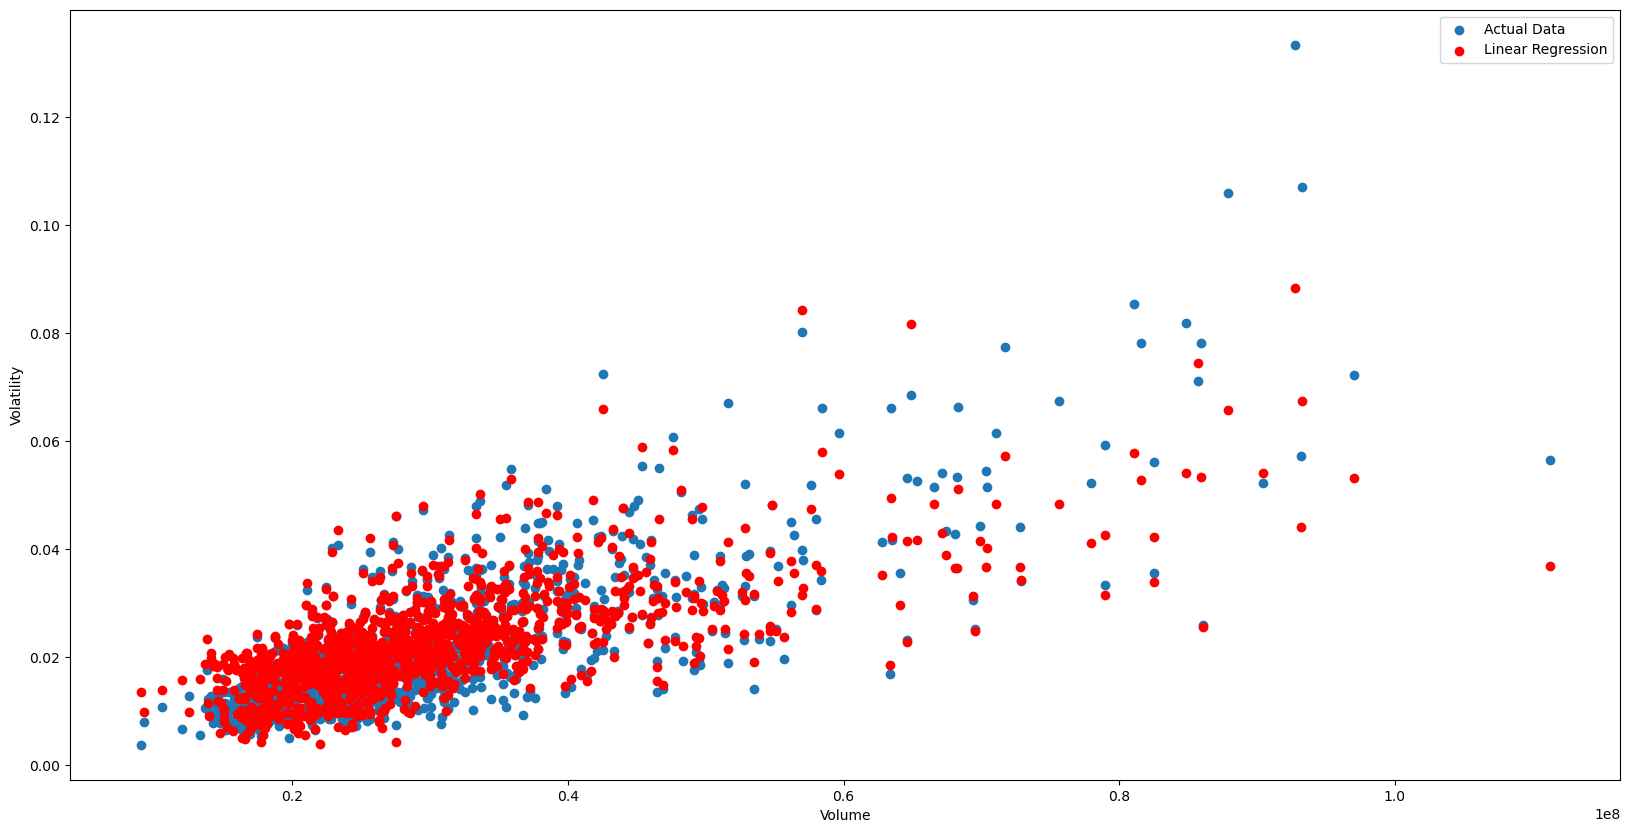

In [56]:
plot(df55)

## Results

In [57]:
d={'SPY':df.Percent_Error,
   'SPY-5Y':df1.Percent_Error,
   'QQQ':df2.Percent_Error,
   'QQQ-5Y':df25.Percent_Error,
   'VEA':df3.Percent_Error,
   'VEA-5Y':df35.Percent_Error,
   'GOOG':df4.Percent_Error,
   'GOOG-5Y':df45.Percent_Error,
   'MSFT':df5.Percent_Error,
   'MSFT-5Y':df55.Percent_Error}
d1=pd.DataFrame(d)
Results=pd.DataFrame(d1.mean())
Results.rename(columns={0:'Mean_Percent_Error'},inplace=True)
Results['Equation']=[equation(slope,intercept),equation(slope,intercept),equation(slope2,intercept2),equation(slope2,intercept2),
                     equation(slope3,intercept3),equation(slope3,intercept3),equation(slope4,intercept4),equation(slope4,intercept4),
                     equation(slope5,intercept5),equation(slope5,intercept5)]

The equation is: Volatility = -4.722611833916634e-12 * Volume + 0.0024817360595476984 *High + -0.002478098396211099 *Low + -4.66664515754614e-05 *Close + 0.01789785380140799
The equation is: Volatility = -4.722611833916634e-12 * Volume + 0.0024817360595476984 *High + -0.002478098396211099 *Low + -4.66664515754614e-05 *Close + 0.01789785380140799
The equation is: Volatility = -5.245543307098316e-12 * Volume + 0.003210654225235713 *High + -0.0031894477376300198 *Low + -9.470187586839605e-05 *Close + 0.023362670184463627
The equation is: Volatility = -5.245543307098316e-12 * Volume + 0.003210654225235713 *High + -0.0031894477376300198 *Low + -9.470187586839605e-05 *Close + 0.023362670184463627
The equation is: Volatility = -1.039729320033439e-11 * Volume + 0.02323270460807233 *High + -0.023402729273662007 *Low + -0.00015167097943369335 *Close + 0.014123787639873394
The equation is: Volatility = -1.039729320033439e-11 * Volume + 0.02323270460807233 *High + -0.023402729273662007 *Low + -0.0

In [58]:
Results

,Mean_Percent_Error,Equation
SPY,2.479695,Volatility = -4.722611833916634e-12 * Volume +...
SPY-5Y,16.483534,Volatility = -4.722611833916634e-12 * Volume +...
QQQ,2.994197,Volatility = -5.245543307098316e-12 * Volume +...
QQQ-5Y,21.873251,Volatility = -5.245543307098316e-12 * Volume +...
VEA,3.389949,Volatility = -1.039729320033439e-11 * Volume +...
VEA-5Y,9.416595,Volatility = -1.039729320033439e-11 * Volume +...
GOOG,3.891164,Volatility = -1.0776005675976258e-12 * Volume ...
GOOG-5Y,19.833697,Volatility = -1.0776005675976258e-12 * Volume ...
MSFT,2.828345,Volatility = -8.086532144599405e-12 * Volume +...
MSFT-5Y,19.873163,Volatility = -8.086532144599405e-12 * Volume +...
